In [1]:
#PSDs for variety of locations in spiral 1 yr set up

import pandas as pd
from XMA_finder import XMA_finder
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.colors import BoundaryNorm, ListedColormap
from matplotlib import cm
from merka05_surface_eq_array_GIPM import merka05_surface_eq_array_GIPM
import glob
from histo_plot_low_vmax import histo_plot
import numpy as np
from XMA_finder import XMA_finder

from numpy.fft import fft, ifft, rfft
from scipy import integrate

In [2]:
##SPIRAL CONE ANGLE

cluster_spir_list = []

spir_path = "/Users/apx059/Documents/1_Yr_Data/1 Year GIPM Sorted/Spiral/**"
spir_list_all = []

for path in glob.glob(spir_path, recursive=True):
    spir_list_all.append(path)
    
#list with only files, not folders

for element in spir_list_all:
    if '.csv' in element:
        cluster_spir_list.append(element)
        
spir_cl_dfs = []

for file in cluster_spir_list:
    df = pd.read_csv(file)
    df['window start'] = pd.to_datetime(df['window start'],format='mixed')
    df = df.set_index('window start')
    spir_cl_dfs.append(df)

In [3]:
#read in CSV for OMNI averages

omni_ave_list = []

omni_path = "/Users/apx059/Documents/1_Yr_Data/1 Year GIPM Sorted/Omni Averages/**"
omni_list_all = []

for path in glob.glob(omni_path, recursive=True):
    omni_list_all.append(path)
    
#list with only files, not folders

for element in omni_list_all:
    if '.csv' in element:
        omni_ave_list.append(element)
        
omni_ave_dfs = []

for file in omni_ave_list:
    df = pd.read_csv(file)
    omni_ave_dfs.append(df)

In [4]:
#get average XMA for all events
omni_ave_all = pd.concat(omni_ave_dfs)
XMA_all = XMA_finder(omni_ave_all)

all_spir = pd.concat(spir_cl_dfs)

In [5]:
omni_ave_all['datetime']=pd.to_datetime(omni_ave_all['datetime'])

In [6]:
spir_df_XY = all_spir.loc[(all_spir['Cluster Loc GIPM Z']> -5) & (all_spir['Cluster Loc GIPM Z'] < 5)]

In [24]:
X_lb = 13
X_lim = 14
Y_lb = 6
Y_lim = 7
mask = spir_df_XY.loc[(spir_df_XY['Cluster Loc GIPM X']>= X_lb) & (spir_df_XY['Cluster Loc GIPM X'] < X_lim)]
mask_2 = mask.loc[(mask['Cluster Loc GIPM Y']>= Y_lb) & (mask['Cluster Loc GIPM Y'] < Y_lim)]

In [25]:
ts = pd.to_datetime('2001-02-14 20:55:00')
mask_2.loc[mask_2.index == ts]

,Unnamed: 0,Cluster Loc GIPM X,Cluster Loc GIPM Y,Cluster Loc GIPM Z,Bc_Bo Min,Bc_Bo Mean,Bc_Bo Max
window start,,,,,,,
2001-02-14 20:55:00,116,13.639599,6.67416,4.007896,0.897804,0.984003,1.115684


In [9]:
ts = pd.to_datetime('2001-02-14 20:55:00')
omni_ave_all.loc[omni_ave_all['datetime']== ts]

,datetime,Np,B_mag,V_gse,B_X_gse,B_Y_gse,B_Z_gse,V_X_gse,V_Y_gse,V_Z_gse,Ave B,Norm Bx,Norm By,Norm Bz,cone angle
403,2001-02-14 20:55:00,2.112,5.783,549.99,3.166,-4.269,0.827,-548.9,-15.0,26.23,5.378833,0.588603,-0.793667,0.153751,53.942029


In [10]:
ts = pd.to_datetime('2001-02-13 13:29:00')
omni_ave_all.loc[omni_ave_all['datetime']== ts]

,datetime,Np,B_mag,V_gse,B_X_gse,B_Y_gse,B_Z_gse,V_X_gse,V_Y_gse,V_Z_gse,Ave B,Norm Bx,Norm By,Norm Bz,cone angle
449,2001-02-13 13:29:00,7.2625,6.04125,503.025,-3.57625,-2.51,-2.70875,-502.8375,6.1125,10.8875,5.140719,-0.695671,-0.488259,-0.52692,45.919274


0.9840030418602917 actual Bc/Bo: 0.984003


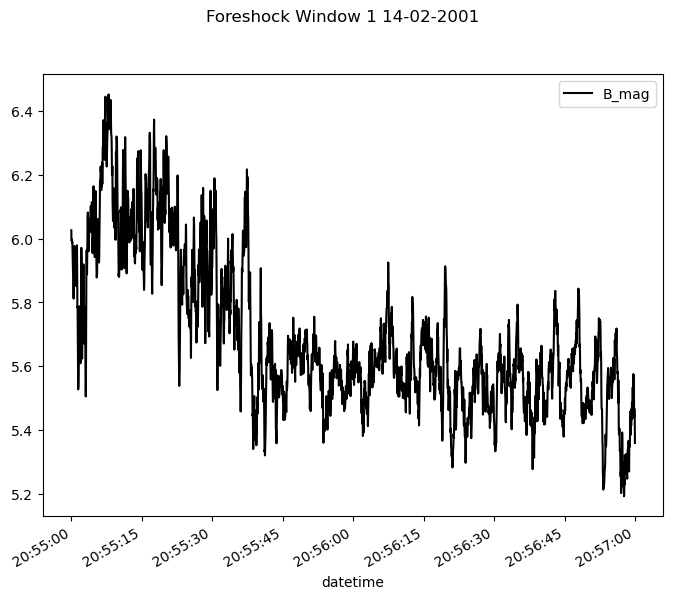

In [11]:
# 13<x<14, 6<y<7: 2001-02-14 20:55:00

df_a = pd.read_csv('/Users/apx059/Documents/1_Yr_Data/52_Weeks_CSVs/Feb-March-2001/C1_2001-02-14 07:17:00.031000.csv')
df_a['datetime'] = pd.to_datetime(df_a['datetime'],format='mixed')
df_a = df_a.set_index('datetime')
#mask to relevant 2 mins for each of those
time_start_a = pd.to_datetime('2001-02-14 20:55:00')
time_end_a = pd.to_datetime('2001-02-14 20:57:00')

df_2mins_a = df_a.loc[((df_a.index >= time_start_a) & (df_a.index < time_end_a))]

#check right df 
Cluster_list_a = df_2mins_a['B_mag'].tolist()
Cluster_mean_a = sum(Cluster_list_a)/len(Cluster_list_a)
Cluster_OMNI_rat_a = Cluster_mean_a/5.783

print(Cluster_OMNI_rat_a, 'actual Bc/Bo: 0.984003')

#it's df_a! Cluster 1

#time series of 2 mins

fig = plt.figure(figsize=(8, 6.5))

fig.suptitle('Foreshock Window 1 14-02-2001')

df_2mins_a['B_mag'].plot(color="black")
plt.legend()

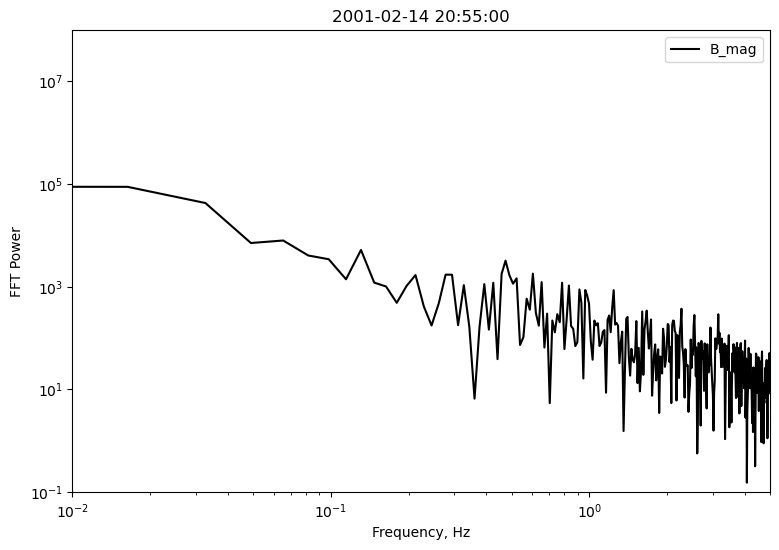

In [12]:
#FFT 2 mins
x_2 = df_2mins_a['B_mag'].to_numpy()
# sampling rate
sr = 22

X_2 = rfft(x_2)
N_2 = len(X_2)
n_2 = np.arange(N_2)
T_2 = N_2/sr
t_2 = df_2mins_a.index.to_numpy()
freq_2 = n_2/T_2
power_2 = np.abs(X_2)**2

##and plot

plt.figure(figsize = (9, 6))
plt.subplot(111)
plt.title('2001-02-14 20:55:00')

plt.plot(freq_2, power_2, color="k", label='B_mag')

#plt.xlabel('Period (s)')
plt.xscale('log')
plt.yscale('log')
plt.ylabel('FFT Power')
plt.xlabel('Frequency, Hz')
plt.xlim(0.01, 5)
plt.ylim(0.1, 100_000_000)
plt.legend()

#plt.subplot(122)
#plt.plot(t, ifft(X), 'k')
#plt.xlabel('Time (s)')
#plt.ylabel('Amplitude')
#plt.tight_layout()
plt.show()

In [13]:
X_lb_2 = 12
X_lim_2 = 13
Y_lb_2 = -9
Y_lim_2 = -8

mask_3 = spir_df_XY.loc[(spir_df_XY['Cluster Loc GIPM X']>= X_lb_2) & (spir_df_XY['Cluster Loc GIPM X'] < X_lim_2)]
mask_4 = mask_3.loc[(mask_3['Cluster Loc GIPM Y']>= Y_lb_2) & (mask_3['Cluster Loc GIPM Y'] < Y_lim_2)]

In [14]:
# 13<x<14 , -7<y<-6, 2001-02-13 13:29:00
#matching raw csv paths:
#C1 /Users/apx059/Documents/1_Yr_Data/Feb-March-2001/C1_2001-02-12 22:09:00.028000.csv
#C2 /Users/apx059/Documents/1_Yr_Data/Feb-March-2001/C2_2001-02-12 22:09:00.008000.csv
#C3 /Users/apx059/Documents/1_Yr_Data/Feb-March-2001/C3_2001-02-12 22:09:00.006000.csv
#C4 /Users/apx059/Documents/1_Yr_Data/Feb-March-2001/C4_2001-02-12 22:09:00.037000.csv


df_e = pd.read_csv('/Users/apx059/Documents/1_Yr_Data/52_Weeks_CSVs/Feb-March-2001/C1_2001-02-12 22:09:00.028000.csv')
df_e['datetime'] = pd.to_datetime(df_e['datetime'],format='mixed')
df_e = df_e.set_index('datetime')

df_f = pd.read_csv('/Users/apx059/Documents/1_Yr_Data/52_Weeks_CSVs/Feb-March-2001/C2_2001-02-12 22:09:00.008000.csv')
df_f['datetime'] = pd.to_datetime(df_f['datetime'],format='mixed')
df_f = df_f.set_index('datetime')

df_g = pd.read_csv('/Users/apx059/Documents/1_Yr_Data/52_Weeks_CSVs/Feb-March-2001/C3_2001-02-12 22:09:00.006000.csv')
df_g['datetime'] = pd.to_datetime(df_g['datetime'],format='mixed')
df_g = df_g.set_index('datetime')

df_h = pd.read_csv('/Users/apx059/Documents/1_Yr_Data/52_Weeks_CSVs/Feb-March-2001/C4_2001-02-12 22:09:00.037000.csv')
df_h['datetime'] = pd.to_datetime(df_h['datetime'],format='mixed')
df_h = df_h.set_index('datetime')

#mask to relevant 2 mins for each of those
time_start_e = pd.to_datetime('2001-02-13 13:29:00')
time_end_e = pd.to_datetime('2001-02-13 13:31:00')

df_2mins_e = df_e.loc[((df_e.index >= time_start_e) & (df_e.index < time_end_e))]
df_2mins_f = df_f.loc[((df_f.index >= time_start_e) & (df_f.index < time_end_e))]
df_2mins_g = df_g.loc[((df_g.index >= time_start_e) & (df_g.index < time_end_e))]
df_2mins_h = df_h.loc[((df_h.index >= time_start_e) & (df_h.index < time_end_e))]

Cluster_list_e = df_2mins_e['B_mag'].tolist()
Cluster_mean_e = sum(Cluster_list_e)/len(Cluster_list_e)
Cluster_OMNI_rat_e = Cluster_mean_e/6.04125

Cluster_list_f = df_2mins_f['B_mag'].tolist()
Cluster_mean_f = sum(Cluster_list_f)/len(Cluster_list_f)
Cluster_OMNI_rat_f = Cluster_mean_f/6.04125

Cluster_list_g = df_2mins_g['B_mag'].tolist()
Cluster_mean_g = sum(Cluster_list_g)/len(Cluster_list_g)
Cluster_OMNI_rat_g = Cluster_mean_g/6.04125

Cluster_list_h = df_2mins_h['B_mag'].tolist()
Cluster_mean_h = sum(Cluster_list_h)/len(Cluster_list_h)
Cluster_OMNI_rat_h = Cluster_mean_h/6.04125

print(Cluster_OMNI_rat_e, Cluster_OMNI_rat_f, Cluster_OMNI_rat_g, Cluster_OMNI_rat_h, 'actual Bc/Bo: 0.899785')
#it's cluster 2! (f)

0.9054394778155445 0.899784920431637 0.9144614049783203 0.8906617069604337 actual Bc/Bo: 0.899785


In [15]:
ts = pd.to_datetime('2001-02-13 13:29:00')
omni_ave_all.loc[omni_ave_all['datetime']== ts]

,datetime,Np,B_mag,V_gse,B_X_gse,B_Y_gse,B_Z_gse,V_X_gse,V_Y_gse,V_Z_gse,Ave B,Norm Bx,Norm By,Norm Bz,cone angle
449,2001-02-13 13:29:00,7.2625,6.04125,503.025,-3.57625,-2.51,-2.70875,-502.8375,6.1125,10.8875,5.140719,-0.695671,-0.488259,-0.52692,45.919274


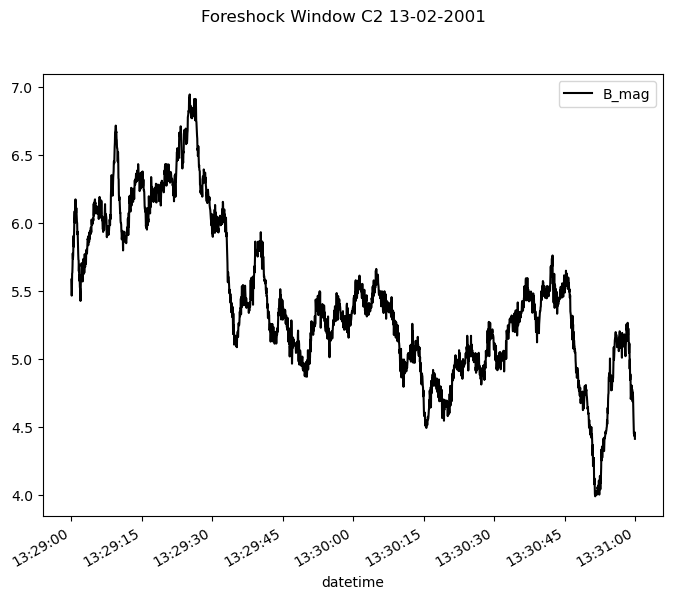

In [16]:
#time series of 2 mins

fig = plt.figure(figsize=(8, 6.5))

fig.suptitle('Foreshock Window C2 13-02-2001')

df_2mins_f['B_mag'].plot(color="black")
plt.legend()

In [17]:
#FFT 2 mins
x_2a = df_2mins_f['B_mag'].to_numpy()
x_2b = df_2mins_f['Bx_gse'].to_numpy()
x_2c = df_2mins_f['By_gse'].to_numpy()
x_2d = df_2mins_f['Bz_gse'].to_numpy()
# sampling rate
sr = 22

X_2a = rfft(x_2a)
N_2a = len(X_2a)
n_2a = np.arange(N_2a)
T_2a = N_2a/sr
t_2a = df_2mins_u.index.to_numpy()
freq_2a = n_2a/T_2a
power_2a = np.abs(X_2a)**2


X_2b = rfft(x_2b)
N_2b = len(X_2b)
n_2b = np.arange(N_2b)
T_2b = N_2b/sr
t_2b = df_2mins_u.index.to_numpy()
freq_2b = n_2b/T_2b
power_2b = np.abs(X_2b)**2


X_2c = rfft(x_2c)
N_2c = len(X_2c)
n_2c = np.arange(N_2c)
T_2c = N_2c/sr
t_2c = df_2mins_u.index.to_numpy()
freq_2c = n_2c/T_2c
power_2c = np.abs(X_2c)**2


X_2d = rfft(x_2d)
N_2d = len(X_2d)
n_2d = np.arange(N_2d)
T_2d = N_2d/sr
t_2d = df_2mins_u.index.to_numpy()
freq_2d = n_2d/T_2d
power_2d = np.abs(X_2d)**2
##and plot

plt.figure(figsize = (9, 6))
plt.subplot(111)

plt.plot(freq_2a, power_2a, color="black", label='B_mag')
plt.plot(freq_2b, power_2b, color="green", label='B_x')
plt.plot(freq_2c, power_2c, color="blue", label='B_y')
plt.plot(freq_2d, power_2d, color="red", label='B_z')

#plt.xlabel('Period (s)')
plt.xscale('log')
plt.yscale('log')
plt.ylabel('FFT Power')
plt.xlabel('Frequency, Hz')
plt.xlim(0.01, 5)
plt.ylim(0.1, 100_000_000)
plt.title('2001-02-13 13:29:00 C2')
plt.legend()

#plt.subplot(122)
#plt.plot(t, ifft(X), 'k')
#plt.xlabel('Time (s)')
#plt.ylabel('Amplitude')
#plt.tight_layout()
plt.show()

NameError: name 'df_2mins_u' is not defined

In [ ]:
X_lb_2 = 13
X_lim_2 = 14
Y_lb_2 = -7
Y_lim_2 = -6

mask_5 = spir_df_XY.loc[(spir_df_XY['Cluster Loc GIPM X']>= X_lb_2) & (spir_df_XY['Cluster Loc GIPM X'] < X_lim_2)]
mask_6 = mask_5.loc[(mask_5['Cluster Loc GIPM Y']>= Y_lb_2) & (mask_5['Cluster Loc GIPM Y'] < Y_lim_2)]

In [ ]:
ts = pd.to_datetime('2001-02-20 14:15:00')
omni_ave_all.loc[omni_ave_all['datetime']== ts]

In [ ]:
#selection 2001-02-20 14:15:00

df_i = pd.read_csv('/Users/apx059/Documents/1_Yr_Data/52_Weeks_CSVs/Feb-March-2001/C1_2001-02-20 01:29:00.028000.csv')
df_i['datetime'] = pd.to_datetime(df_i['datetime'],format='mixed')
df_i = df_i.set_index('datetime')

df_j = pd.read_csv('/Users/apx059/Documents/1_Yr_Data/52_Weeks_CSVs/Feb-March-2001/C2_2001-02-20 01:29:00.018000.csv')
df_j['datetime'] = pd.to_datetime(df_j['datetime'],format='mixed')
df_j = df_j.set_index('datetime')

df_k = pd.read_csv('/Users/apx059/Documents/1_Yr_Data/52_Weeks_CSVs/Feb-March-2001/C3_2001-02-20 01:29:00.025000.csv')
df_k['datetime'] = pd.to_datetime(df_k['datetime'],format='mixed')
df_k = df_k.set_index('datetime')

df_l = pd.read_csv('/Users/apx059/Documents/1_Yr_Data/52_Weeks_CSVs/Feb-March-2001/C4_2001-02-20 01:29:00.024000.csv')
df_l['datetime'] = pd.to_datetime(df_l['datetime'],format='mixed')
df_l = df_l.set_index('datetime')

#mask to relevant 2 mins for each of those
time_start_c = pd.to_datetime('2001-02-20 14:15:00')
time_end_c = pd.to_datetime('2001-02-20 14:17:00')

df_2mins_i = df_i.loc[((df_i.index >= time_start_c) & (df_i.index < time_end_c))]
df_2mins_j = df_j.loc[((df_j.index >= time_start_c) & (df_j.index < time_end_c))]
df_2mins_k = df_k.loc[((df_k.index >= time_start_c) & (df_k.index < time_end_c))]
df_2mins_l = df_l.loc[((df_l.index >= time_start_c) & (df_l.index < time_end_c))]


In [ ]:

Cluster_list_i = df_2mins_i['B_mag'].tolist()
Cluster_mean_i = sum(Cluster_list_i)/len(Cluster_list_i)
Cluster_OMNI_rat_i = Cluster_mean_i/11.815


Cluster_list_j = df_2mins_j['B_mag'].tolist()
Cluster_mean_j = sum(Cluster_list_j)/len(Cluster_list_j)
Cluster_OMNI_rat_j = Cluster_mean_j/11.815

Cluster_list_k = df_2mins_k['B_mag'].tolist()
Cluster_mean_k = sum(Cluster_list_k)/len(Cluster_list_k)
Cluster_OMNI_rat_k = Cluster_mean_k/11.815

Cluster_list_l = df_2mins_l['B_mag'].tolist()
Cluster_mean_l = sum(Cluster_list_l)/len(Cluster_list_l)
Cluster_OMNI_rat_l = Cluster_mean_l/11.815

print(Cluster_OMNI_rat_i, Cluster_OMNI_rat_j, Cluster_OMNI_rat_k, Cluster_OMNI_rat_l, 'actual Bc/Bo: 1.009168')
#it's cluster 2 (j) 

In [ ]:
#time series of 2 mins

fig = plt.figure(figsize=(8, 6.5))

fig.suptitle('Foreshock Window C2 2001-02-20 14:15:00')

df_2mins_j['B_mag'].plot(color="black")
plt.legend()

In [ ]:
#FFT 2 mins
x_2 = df_2mins_j['B_mag'].to_numpy()
# sampling rate
sr = 22

X_2 = rfft(x_2)
N_2 = len(X_2)
n_2 = np.arange(N_2)
T_2 = N_2/sr
t_2 = df_2mins_j.index.to_numpy()
freq_2 = n_2/T_2
power_2 = np.abs(X_2)**2

##and plot

plt.figure(figsize = (9, 6))
plt.subplot(111)

plt.plot(freq_2, power_2, color="green", label='B_mag')

#plt.xlabel('Period (s)')
plt.xscale('log')
plt.yscale('log')
plt.ylabel('FFT Power')
plt.xlabel('Frequency, Hz')
plt.xlim(0.01, 5)
plt.ylim(0.1, 100_000_000)
plt.legend()

#plt.subplot(122)
#plt.plot(t, ifft(X), 'k')
#plt.xlabel('Time (s)')
#plt.ylabel('Amplitude')
#plt.tight_layout()
plt.show()

In [ ]:
X_lb_3 = 12
X_lim_3 = 13
Y_lb_3 = -9
Y_lim_3 = -8

mask_7 = spir_df_XY.loc[(spir_df_XY['Cluster Loc GIPM X']>= X_lb_3) & (spir_df_XY['Cluster Loc GIPM X'] < X_lim_3)]
mask_8 = mask_7.loc[(mask_7['Cluster Loc GIPM Y']>= Y_lb_3) & (mask_7['Cluster Loc GIPM Y'] < Y_lim_3)]

In [ ]:
mask_8

In [ ]:
ts = pd.to_datetime('2001-04-10 16:03:00')
omni_ave_all.loc[omni_ave_all['datetime']== ts]

In [ ]:
#selection 2001-04-10 16:03:00

df_m = pd.read_csv('/Users/apx059/Documents/1_Yr_Data/52_Weeks_CSVs/March-April/2001-04-10 01:06:00.011000C1.csv')
df_m['datetime'] = pd.to_datetime(df_m['datetime'],format='mixed')
df_m = df_m.set_index('datetime')

df_n = pd.read_csv('/Users/apx059/Documents/1_Yr_Data/52_Weeks_CSVs/March-April/2001-04-10 01:10:00.028000C2.csv')
df_n['datetime'] = pd.to_datetime(df_n['datetime'],format='mixed')
df_n = df_n.set_index('datetime')

df_o = pd.read_csv('/Users/apx059/Documents/1_Yr_Data/52_Weeks_CSVs/March-April/2001-04-10 12:57:09.646000C3.csv')
df_o['datetime'] = pd.to_datetime(df_o['datetime'],format='mixed')
df_o = df_o.set_index('datetime')

df_p = pd.read_csv('/Users/apx059/Documents/1_Yr_Data/52_Weeks_CSVs/March-April/2001-04-10 01:12:00.008000C4.csv')
df_p['datetime'] = pd.to_datetime(df_p['datetime'],format='mixed')
df_p = df_p.set_index('datetime')

#mask to relevant 2 mins for each of those
time_start_m = pd.to_datetime('2001-04-10 16:03:00')
time_end_m = pd.to_datetime('2001-04-10 16:05:00')

df_2mins_m = df_m.loc[((df_m.index >= time_start_m) & (df_m.index < time_end_m))]
df_2mins_n = df_n.loc[((df_n.index >= time_start_m) & (df_n.index < time_end_m))]
df_2mins_o = df_o.loc[((df_o.index >= time_start_m) & (df_o.index < time_end_m))]
df_2mins_p = df_p.loc[((df_p.index >= time_start_m) & (df_p.index < time_end_m))]


In [ ]:

Cluster_list_m = df_2mins_m['B_mag'].tolist()
Cluster_mean_m = sum(Cluster_list_m)/len(Cluster_list_m)
Cluster_OMNI_rat_m = Cluster_mean_m/4.38


Cluster_list_n = df_2mins_n['B_mag'].tolist()
Cluster_mean_n = sum(Cluster_list_n)/len(Cluster_list_n)
Cluster_OMNI_rat_n = Cluster_mean_n/4.38

Cluster_list_o = df_2mins_o['B_mag'].tolist()
Cluster_mean_o = sum(Cluster_list_o)/len(Cluster_list_o)
Cluster_OMNI_rat_o = Cluster_mean_o/4.38

Cluster_list_p = df_2mins_p['B_mag'].tolist()
Cluster_mean_p = sum(Cluster_list_p)/len(Cluster_list_p)
Cluster_OMNI_rat_p = Cluster_mean_p/4.38

print(Cluster_OMNI_rat_m, Cluster_OMNI_rat_n, Cluster_OMNI_rat_o, Cluster_OMNI_rat_p, 'actual Bc/Bo: 0.995160')
#it's C3 (o)

In [ ]:
#time series of 2 mins

fig = plt.figure(figsize=(8, 6.5))

fig.suptitle('Foreshock Window C3 2001-04-10 16:03:00')

df_2mins_o['B_mag'].plot(color="black")
plt.legend()

In [ ]:
#FFT 2 mins
x_2 = df_2mins_o['B_mag'].to_numpy()
# sampling rate
sr = 22

X_2 = rfft(x_2)
N_2 = len(X_2)
n_2 = np.arange(N_2)
T_2 = N_2/sr
t_2 = df_2mins_o.index.to_numpy()
freq_2 = n_2/T_2
power_2 = np.abs(X_2)**2

##and plot

plt.figure(figsize = (9, 6))
plt.subplot(111)

plt.plot(freq_2, power_2, color="green", label='B_mag')

#plt.xlabel('Period (s)')
plt.xscale('log')
plt.yscale('log')
plt.ylabel('FFT Power')
plt.xlabel('Frequency, Hz')
plt.xlim(0.01, 5)
plt.ylim(0.1, 100_000_000)
plt.legend()

#plt.subplot(122)
#plt.plot(t, ifft(X), 'k')
#plt.xlabel('Time (s)')
#plt.ylabel('Amplitude')
#plt.tight_layout()
plt.show()

In [ ]:
X_lb_4 = 12
X_lim_4 = 13
Y_lb_4 = -11
Y_lim_4 = -10

mask_9 = spir_df_XY.loc[(spir_df_XY['Cluster Loc GIPM X']>= X_lb_4) & (spir_df_XY['Cluster Loc GIPM X'] < X_lim_4)]
mask_10 = mask_9.loc[(mask_9['Cluster Loc GIPM Y']>= Y_lb_4) & (mask_9['Cluster Loc GIPM Y'] < Y_lim_4)]

In [ ]:
mask_10

In [ ]:
ts = pd.to_datetime('2001-02-10 03:14:00')
omni_ave_all.loc[omni_ave_all['datetime']== ts]

In [ ]:
#2001-02-10 03:14:00


df_q = pd.read_csv('/Users/apx059/Documents/1_Yr_Data/Feb-March-2001/C1_2001-02-09 14:06:16.167000.csv')
df_q['datetime'] = pd.to_datetime(df_q['datetime'],format='mixed')
df_q = df_q.set_index('datetime')

df_r = pd.read_csv('/Users/apx059/Documents/1_Yr_Data/Feb-March-2001/C2_2001-02-09 14:06:13.348000.csv')
df_r['datetime'] = pd.to_datetime(df_r['datetime'],format='mixed')
df_r = df_r.set_index('datetime')

df_s = pd.read_csv('/Users/apx059/Documents/1_Yr_Data/Feb-March-2001/C3_2001-02-09 13:01:00.043000.csv')
df_s['datetime'] = pd.to_datetime(df_s['datetime'],format='mixed')
df_s = df_s.set_index('datetime')

df_t = pd.read_csv('/Users/apx059/Documents/1_Yr_Data/Feb-March-2001/C4_2001-02-09 14:06:14.957000.csv')
df_t['datetime'] = pd.to_datetime(df_t['datetime'],format='mixed')
df_t = df_t.set_index('datetime')

#mask to relevant 2 mins for each of those
time_start_q = pd.to_datetime('2001-02-10 03:14:00')
time_end_q = pd.to_datetime('2001-02-10 03:16:00')

df_2mins_q = df_q.loc[((df_q.index >= time_start_q) & (df_q.index < time_end_q))]
df_2mins_r = df_r.loc[((df_r.index >= time_start_q) & (df_r.index < time_end_q))]
df_2mins_s = df_s.loc[((df_s.index >= time_start_q) & (df_s.index < time_end_q))]
df_2mins_t = df_t.loc[((df_t.index >= time_start_q) & (df_t.index < time_end_q))]

In [ ]:
df_q

In [ ]:
Cluster_list_q = df_2mins_q['B_mag'].tolist()
Cluster_mean_q = sum(Cluster_list_q)/len(Cluster_list_q)
Cluster_OMNI_rat_q= Cluster_mean_q/5.766

Cluster_list_r = df_2mins_r['B_mag'].tolist()
Cluster_mean_r = sum(Cluster_list_r)/len(Cluster_list_r)
Cluster_OMNI_rat_r = Cluster_mean_r/5.766

Cluster_list_s = df_2mins_s['B_mag'].tolist()
Cluster_mean_s = sum(Cluster_list_s)/len(Cluster_list_s)
Cluster_OMNI_rat_s = Cluster_mean_s/5.766

Cluster_list_t = df_2mins_t['B_mag'].tolist()
Cluster_mean_t = sum(Cluster_list_t)/len(Cluster_list_t)
Cluster_OMNI_rat_t = Cluster_mean_t/5.766

print(Cluster_OMNI_rat_q, Cluster_OMNI_rat_r, Cluster_OMNI_rat_s, Cluster_OMNI_rat_t, 'actual Bc/Bo: 0.967887')
#it's C2 (r)

In [ ]:
df_2mins_q

In [ ]:
df_2mins_r

In [ ]:
#time series of 2 mins

fig = plt.figure(figsize=(8, 6.5))

fig.suptitle('Foreshock Window C2 2001-02-10 03:14:00')

df_2mins_r['B_mag'].plot(color="black")
plt.legend()

In [ ]:
#FFT 2 mins
x_2 = df_2mins_r['B_mag'].to_numpy()
# sampling rate
sr = 22

X_2 = rfft(x_2)
N_2 = len(X_2)
n_2 = np.arange(N_2)
T_2 = N_2/sr
t_2 = df_2mins_r.index.to_numpy()
freq_2 = n_2/T_2
power_2 = np.abs(X_2)**2

##and plot

plt.figure(figsize = (9, 6))
plt.subplot(111)

plt.plot(freq_2, power_2, color="green", label='B_mag')

#plt.xlabel('Period (s)')
plt.xscale('log')
plt.yscale('log')
plt.ylabel('FFT Power')
plt.xlabel('Frequency, Hz')
plt.xlim(0.01, 5)
plt.ylim(0.1, 100_000_000)
plt.legend()

#plt.subplot(122)
#plt.plot(t, ifft(X), 'k')
#plt.xlabel('Time (s)')
#plt.ylabel('Amplitude')
#plt.tight_layout()
plt.show()

In [ ]:
X_lb_5 = 12
X_lim_5 = 13
Y_lb_5 = -14
Y_lim_5 = -13

mask_11 = spir_df_XY.loc[(spir_df_XY['Cluster Loc GIPM X']>= X_lb_5) & (spir_df_XY['Cluster Loc GIPM X'] < X_lim_5)]
mask_12 = mask_11.loc[(mask_11['Cluster Loc GIPM Y']>= Y_lb_5) & (mask_11['Cluster Loc GIPM Y'] < Y_lim_5)]

In [ ]:
mask_12

In [ ]:
#2002-01-21 13:50:00

ts = pd.to_datetime('2002-01-21 13:50:00')
omni_ave_all.loc[omni_ave_all['datetime']== ts]

In [ ]:
df_u = pd.read_csv('/Users/apx059/Documents/1_Yr_Data/52_Weeks_CSVs/Dec-Feb/2002-01-20 20:01:27.501000C1.csv')
df_u['datetime'] = pd.to_datetime(df_u['datetime'],format='mixed')
df_u = df_u.set_index('datetime')

df_v = pd.read_csv('/Users/apx059/Documents/1_Yr_Data/52_Weeks_CSVs/Dec-Feb/2002-01-20 20:01:33.524000C2.csv')
df_v['datetime'] = pd.to_datetime(df_v['datetime'],format='mixed')
df_v = df_v.set_index('datetime')

df_w = pd.read_csv('/Users/apx059/Documents/1_Yr_Data/52_Weeks_CSVs/Dec-Feb/2002-01-20 20:01:27.100000C3.csv')
df_w['datetime'] = pd.to_datetime(df_w['datetime'],format='mixed')
df_w = df_w.set_index('datetime')

df_x = pd.read_csv('/Users/apx059/Documents/1_Yr_Data/52_Weeks_CSVs/Dec-Feb/2002-01-20 20:01:09.497000C4.csv')
df_x['datetime'] = pd.to_datetime(df_x['datetime'],format='mixed')
df_x = df_x.set_index('datetime')

#mask to relevant 2 mins for each of those
time_start_u = pd.to_datetime('2002-01-21 13:50:00')
time_end_u = pd.to_datetime('2002-01-21 13:52:00')

df_2mins_u = df_u.loc[((df_u.index >= time_start_u) & (df_u.index < time_end_u))]
df_2mins_v = df_v.loc[((df_v.index >= time_start_u) & (df_v.index < time_end_u))]
df_2mins_w = df_w.loc[((df_w.index >= time_start_u) & (df_w.index < time_end_u))]
df_2mins_x = df_x.loc[((df_x.index >= time_start_u) & (df_x.index < time_end_u))]

In [ ]:
df_2mins_v.describe()

In [ ]:
Cluster_list_v = df_2mins_v['B_mag'].tolist()
Cluster_mean_v = sum(Cluster_list_v)/len(Cluster_list_v)
Cluster_OMNI_rat_v = Cluster_mean_v/6.54

print(Cluster_OMNI_rat_v,'actual Bc/Bo: 0.916976')
#it's C2 (v)

In [ ]:
#time series of 2 mins

fig = plt.figure(figsize=(8, 6.5))

fig.suptitle('Foreshock Window C2 2002-01-21 13:50:00')

df_2mins_v['B_mag'].plot(color="black", label='mag')
df_2mins_v['Bx_gse'].plot(color="green", label='Bx')
df_2mins_v['By_gse'].plot(color="blue", label='By')
df_2mins_v['Bz_gse'].plot(color="red", label = 'Bz')
plt.legend()

In [ ]:
#FFT 2 mins
x_2a = df_2mins_v['B_mag'].to_numpy()
x_2b = df_2mins_v['Bx_gse'].to_numpy()
x_2c = df_2mins_v['By_gse'].to_numpy()
x_2d = df_2mins_v['Bz_gse'].to_numpy()
# sampling rate
sr = 22

X_2a = rfft(x_2a)
N_2a = len(X_2a)
n_2a = np.arange(N_2a)
T_2a = N_2a/sr
t_2a = df_2mins_u.index.to_numpy()
freq_2a = n_2a/T_2a
power_2a = np.abs(X_2a)**2


X_2b = rfft(x_2b)
N_2b = len(X_2b)
n_2b = np.arange(N_2b)
T_2b = N_2b/sr
t_2b = df_2mins_u.index.to_numpy()
freq_2b = n_2b/T_2b
power_2b = np.abs(X_2b)**2


X_2c = rfft(x_2c)
N_2c = len(X_2c)
n_2c = np.arange(N_2c)
T_2c = N_2c/sr
t_2c = df_2mins_u.index.to_numpy()
freq_2c = n_2c/T_2c
power_2c = np.abs(X_2c)**2


X_2d = rfft(x_2d)
N_2d = len(X_2d)
n_2d = np.arange(N_2d)
T_2d = N_2d/sr
t_2d = df_2mins_u.index.to_numpy()
freq_2d = n_2d/T_2d
power_2d = np.abs(X_2d)**2
##and plot

plt.figure(figsize = (9, 6))
plt.subplot(111)

plt.plot(freq_2a, power_2a, color="black", label='B_mag')
plt.plot(freq_2b, power_2b, color="green", label='B_x')
plt.plot(freq_2c, power_2c, color="blue", label='B_y')
plt.plot(freq_2d, power_2d, color="red", label='B_z')

#plt.xlabel('Period (s)')
plt.xscale('log')
plt.yscale('log')
plt.ylabel('FFT Power')
plt.xlabel('Frequency, Hz')
plt.xlim(0.01, 5)
plt.ylim(0.1, 100_000_000)
plt.title('2002-01-21 13:50:00 C2')
plt.legend()

#plt.subplot(122)
#plt.plot(t, ifft(X), 'k')
#plt.xlabel('Time (s)')
#plt.ylabel('Amplitude')
#plt.tight_layout()
plt.show()

In [ ]:
X_lb_6 = 11
X_lim_6 = 12
Y_lb_6 = -15
Y_lim_6 = -14

mask_13 = spir_df_XY.loc[(spir_df_XY['Cluster Loc GIPM X']>= X_lb_6) & (spir_df_XY['Cluster Loc GIPM X'] < X_lim_6)]
mask_14 = mask_13.loc[(mask_13['Cluster Loc GIPM Y']>= Y_lb_6) & (mask_13['Cluster Loc GIPM Y'] < Y_lim_6)]

In [ ]:
mask_14

In [ ]:
#2001-03-31 20:22:00

ts = pd.to_datetime('2001-03-31 20:22:00')
omni_ave_all.loc[omni_ave_all['datetime']== ts]

In [ ]:
df_aa = pd.read_csv('/Users/apx059/Documents/1_Yr_Data/52_Weeks_CSVs/March-April/2001-03-31 12:38:00.009000C3.csv')
df_aa['datetime'] = pd.to_datetime(df_aa['datetime'],format='mixed')
df_aa = df_aa.set_index('datetime')

#mask to relevant 2 mins for each of those
time_start_aa = pd.to_datetime('2001-03-31 20:22:00')
time_end_aa = pd.to_datetime('2001-03-31 20:24:00')

df_2mins_aa = df_aa.loc[((df_aa.index >= time_start_aa) & (df_aa.index < time_end_aa))]

In [ ]:
Cluster_list_aa = df_2mins_aa['B_mag'].tolist()
Cluster_mean_aa = sum(Cluster_list_aa)/len(Cluster_list_aa)
Cluster_OMNI_rat_aa = Cluster_mean_aa/23.214444

print(Cluster_OMNI_rat_aa, 'actual Bc/Bo: 1.125503')
#it's C3 (aa)

In [ ]:
#time series of 2 mins

fig = plt.figure(figsize=(8, 6.5))

fig.suptitle('Foreshock Window C3 2001-03-31 20:22:00')

df_2mins_aa['B_mag'].plot(color="black", label='mag')
df_2mins_aa['Bx_gse'].plot(color="green", label='Bx')
df_2mins_aa['By_gse'].plot(color="blue", label='By')
df_2mins_aa['Bz_gse'].plot(color="red", label = 'Bz')
plt.legend()

In [ ]:
#time series of 2 mins

fig = plt.figure(figsize=(8, 6.5))

fig.suptitle('Foreshock Window C3 2001-03-31 20:22:00')

df_2mins_aa['B_mag'].plot(color="black", label='mag')
df_2mins_aa['Bx_gse'].plot(color="green", label='Bx')

plt.legend()

In [ ]:
#FFT 2 mins

#FFT 2 mins
x_2a = df_2mins_aa['B_mag'].to_numpy()
x_2b = df_2mins_aa['Bx_gse'].to_numpy()
x_2c = df_2mins_aa['By_gse'].to_numpy()
x_2d = df_2mins_aa['Bz_gse'].to_numpy()
# sampling rate
sr = 22

X_2a = rfft(x_2a)
N_2a = len(X_2a)
n_2a = np.arange(N_2a)
T_2a = N_2a/sr
t_2a = df_2mins_u.index.to_numpy()
freq_2a = n_2a/T_2a
power_2a = np.abs(X_2a)**2


X_2b = rfft(x_2b)
N_2b = len(X_2b)
n_2b = np.arange(N_2b)
T_2b = N_2b/sr
t_2b = df_2mins_u.index.to_numpy()
freq_2b = n_2b/T_2b
power_2b = np.abs(X_2b)**2


X_2c = rfft(x_2c)
N_2c = len(X_2c)
n_2c = np.arange(N_2c)
T_2c = N_2c/sr
t_2c = df_2mins_u.index.to_numpy()
freq_2c = n_2c/T_2c
power_2c = np.abs(X_2c)**2


X_2d = rfft(x_2d)
N_2d = len(X_2d)
n_2d = np.arange(N_2d)
T_2d = N_2d/sr
t_2d = df_2mins_u.index.to_numpy()
freq_2d = n_2d/T_2d
power_2d = np.abs(X_2d)**2
##and plot

plt.figure(figsize = (9, 6))
plt.subplot(111)

plt.plot(freq_2a, power_2a, color="black", label='B_mag')
plt.plot(freq_2b, power_2b, color="green", label='B_x')
plt.plot(freq_2c, power_2c, color="blue", label='B_y')
plt.plot(freq_2d, power_2d, color="red", label='B_z')

#plt.xlabel('Period (s)')
plt.xscale('log')
plt.yscale('log')
plt.ylabel('FFT Power')
plt.xlabel('Frequency, Hz')
plt.xlim(0.01, 5)
plt.ylim(0.1, 100_000_000)
plt.title('2001-03-31 20:22-20:24 C3')
plt.legend()

#plt.subplot(122)
#plt.plot(t, ifft(X), 'k')
#plt.xlabel('Time (s)')
#plt.ylabel('Amplitude')
#plt.tight_layout()
plt.show()

In [ ]:
##now move to ANOTHER box

X_lb_7 = 10
X_lim_7 = 11
Y_lb_7 = -15
Y_lim_7 = -14

mask_15 = spir_df_XY.loc[(spir_df_XY['Cluster Loc GIPM X']>= X_lb_7) & (spir_df_XY['Cluster Loc GIPM X'] < X_lim_7)]
mask_16 = mask_15.loc[(mask_15['Cluster Loc GIPM Y']>= Y_lb_7) & (mask_15['Cluster Loc GIPM Y'] < Y_lim_7)]

In [ ]:
mask_16

In [ ]:
ts = pd.to_datetime('2001-03-31 19:54:00')
omni_ave_all.loc[omni_ave_all['datetime']== ts]

In [ ]:
#mask to relevant 2 mins for each of those
time_start_ac = pd.to_datetime('2001-03-31 19:54:00')
time_end_ac = pd.to_datetime('2001-03-31 19:56:00')

df_2mins_ac = df_y.loc[((df_y.index >= time_start_ac) & (df_y.index < time_end_ac))]
df_2mins_ad = df_z.loc[((df_z.index >= time_start_ac) & (df_z.index < time_end_ac))]
df_2mins_ae = df_aa.loc[((df_aa.index >= time_start_ac) & (df_aa.index < time_end_ac))]
df_2mins_af = df_ab.loc[((df_ab.index >= time_start_ac) & (df_ab.index < time_end_ac))]

In [ ]:
Cluster_list_ac = df_2mins_ac['B_mag'].tolist()
Cluster_mean_ac = sum(Cluster_list_ac)/len(Cluster_list_ac)
Cluster_OMNI_rat_ac = Cluster_mean_ac/30.048889

Cluster_list_ad = df_2mins_ad['B_mag'].tolist()
Cluster_mean_ad = sum(Cluster_list_ad)/len(Cluster_list_ad)
Cluster_OMNI_rat_ad = Cluster_mean_ad/30.048889

Cluster_list_ae = df_2mins_ae['B_mag'].tolist()
Cluster_mean_ae = sum(Cluster_list_ae)/len(Cluster_list_ae)
Cluster_OMNI_rat_ae = Cluster_mean_ae/30.048889

Cluster_list_af = df_2mins_af['B_mag'].tolist()
Cluster_mean_af = sum(Cluster_list_af)/len(Cluster_list_af)
Cluster_OMNI_rat_af = Cluster_mean_af/30.048889

print(Cluster_OMNI_rat_ac, Cluster_OMNI_rat_ad, Cluster_OMNI_rat_ae, Cluster_OMNI_rat_af, 'actual Bc/Bo: 0.944076')
#it's C1 (ac)

In [ ]:
#time series of 2 mins

fig = plt.figure(figsize=(8, 6.5))

fig.suptitle('Foreshock Window C1 2001-03-31 19:54:00')

df_2mins_ac['B_mag'].plot(color="black", label='mag')
df_2mins_ac['Bx_gse'].plot(color="green", label='Bx')
df_2mins_ac['By_gse'].plot(color="blue", label='By')
df_2mins_ac['Bz_gse'].plot(color="red", label = 'Bz')
plt.legend()

In [ ]:
fig = plt.figure(figsize=(8, 6.5))

fig.suptitle('Foreshock Window C1 2001-03-31 19:54:00')

#df_2mins_ac['B_mag'].plot(color="black", label='mag')
#df_2mins_ac['Bx_gse'].plot(color="green", label='Bx')
#df_2mins_ac['By_gse'].plot(color="blue", label='By')
df_2mins_ac['Bz_gse'].plot(color="red", label = 'Bz')
plt.legend()

In [ ]:
#FFT 2 mins

#FFT 2 mins
x_2a = df_2mins_ac['B_mag'].to_numpy()
x_2b = df_2mins_ac['Bx_gse'].to_numpy()
x_2c = df_2mins_ac['By_gse'].to_numpy()
x_2d = df_2mins_ac['Bz_gse'].to_numpy()
# sampling rate
sr = 22

X_2a = rfft(x_2a)
N_2a = len(X_2a)
n_2a = np.arange(N_2a)
T_2a = N_2a/sr
t_2a = df_2mins_u.index.to_numpy()
freq_2a = n_2a/T_2a
power_2a = np.abs(X_2a)**2


X_2b = rfft(x_2b)
N_2b = len(X_2b)
n_2b = np.arange(N_2b)
T_2b = N_2b/sr
t_2b = df_2mins_u.index.to_numpy()
freq_2b = n_2b/T_2b
power_2b = np.abs(X_2b)**2


X_2c = rfft(x_2c)
N_2c = len(X_2c)
n_2c = np.arange(N_2c)
T_2c = N_2c/sr
t_2c = df_2mins_u.index.to_numpy()
freq_2c = n_2c/T_2c
power_2c = np.abs(X_2c)**2


X_2d = rfft(x_2d)
N_2d = len(X_2d)
n_2d = np.arange(N_2d)
T_2d = N_2d/sr
t_2d = df_2mins_u.index.to_numpy()
freq_2d = n_2d/T_2d
power_2d = np.abs(X_2d)**2
##and plot

plt.figure(figsize = (9, 6))
plt.subplot(111)

plt.plot(freq_2a, power_2a, color="black", label='B_mag')
plt.plot(freq_2b, power_2b, color="green", label='B_x')
plt.plot(freq_2c, power_2c, color="blue", label='B_y')
plt.plot(freq_2d, power_2d, color="red", label='B_z')

#plt.xlabel('Period (s)')
plt.xscale('log')
plt.yscale('log')
plt.ylabel('FFT Power')
plt.xlabel('Frequency, Hz')
plt.xlim(0.01, 5)
plt.ylim(0.1, 100_000_000)
plt.legend()

#plt.subplot(122)
#plt.plot(t, ifft(X), 'k')
#plt.xlabel('Time (s)')
#plt.ylabel('Amplitude')
#plt.tight_layout()
plt.show()

In [ ]:
##now move to ANOTHER box

X_lb_8 = 8
Y_lim_8 = -16

mask_17 = spir_df_XY.loc[(spir_df_XY['Cluster Loc GIPM X']>= X_lb_8)]
mask_18 = mask_17.loc[(mask_17['Cluster Loc GIPM Y']< Y_lim_8)]

In [ ]:
mask_18

In [ ]:
ts = pd.to_datetime('2002-01-02 12:46:00')
omni_ave_all.loc[omni_ave_all['datetime']== ts]

In [ ]:
df_zz = pd.read_csv('/Users/apx059/Documents/1_Yr_Data/52_Weeks_CSVs/Dec-Feb/2002-01-01 16:12:00.009000C1.csv')
df_zz['datetime'] = pd.to_datetime(df_zz['datetime'],format='mixed')
df_zz = df_zz.set_index('datetime')

df_za = pd.read_csv('/Users/apx059/Documents/1_Yr_Data/52_Weeks_CSVs/Dec-Feb/2002-01-01 15:51:00.016000C2.csv')
df_za['datetime'] = pd.to_datetime(df_za['datetime'],format='mixed')
df_za = df_za.set_index('datetime')

df_zy = pd.read_csv('/Users/apx059/Documents/1_Yr_Data/52_Weeks_CSVs/Dec-Feb/2002-01-01 16:17:00.020000C3.csv')
df_zy['datetime'] = pd.to_datetime(df_zy['datetime'],format='mixed')
df_zy = df_zy.set_index('datetime')

df_zx = pd.read_csv('/Users/apx059/Documents/1_Yr_Data/52_Weeks_CSVs/Dec-Feb/2002-01-01 15:43:00.021000C4.csv')
df_zx['datetime'] = pd.to_datetime(df_zx['datetime'],format='mixed')
df_zx = df_zx.set_index('datetime')

#mask to relevant 2 mins for each of those
time_start_zz = pd.to_datetime('2002-01-02 12:46:00')
time_end_zz = pd.to_datetime('2002-01-02 12:48:00')

df_2mins_zz = df_zz.loc[((df_zz.index >= time_start_zz) & (df_zz.index < time_end_zz))]
df_2mins_za = df_za.loc[((df_za.index >= time_start_zz) & (df_za.index < time_end_zz))]
df_2mins_zy = df_zy.loc[((df_zy.index >= time_start_zz) & (df_zy.index < time_end_zz))]
df_2mins_zx = df_zx.loc[((df_zx.index >= time_start_zz) & (df_zx.index < time_end_zz))]

In [ ]:
Cluster_list_zz = df_2mins_zz['B_mag'].tolist()
Cluster_mean_zz = sum(Cluster_list_zz)/len(Cluster_list_zz)
Cluster_OMNI_rat_zz = Cluster_mean_zz/6.77

Cluster_list_za = df_2mins_za['B_mag'].tolist()
Cluster_mean_za = sum(Cluster_list_za)/len(Cluster_list_za)
Cluster_OMNI_rat_za = Cluster_mean_za/6.77

Cluster_list_zy = df_2mins_zy['B_mag'].tolist()
Cluster_mean_zy = sum(Cluster_list_zy)/len(Cluster_list_zy)
Cluster_OMNI_rat_zy = Cluster_mean_zy/6.77

Cluster_list_zx = df_2mins_zx['B_mag'].tolist()
Cluster_mean_zx = sum(Cluster_list_zx)/len(Cluster_list_zx)
Cluster_OMNI_rat_zx = Cluster_mean_zx/6.77

print(Cluster_OMNI_rat_zz, Cluster_OMNI_rat_za, Cluster_OMNI_rat_zy, Cluster_OMNI_rat_zx, 'actual Bc/Bo: 2.180067')
#it's C1 (zz)

In [ ]:
#time series of 2 mins

fig = plt.figure(figsize=(8, 6.5))

fig.suptitle('Foreshock Window C1 2002-01-02 12:46:00')

df_2mins_zz['B_mag'].plot(color="black", label='mag')
df_2mins_zz['Bx_gse'].plot(color="green", label='Bx')
df_2mins_zz['By_gse'].plot(color="blue", label='By')
df_2mins_zz['Bz_gse'].plot(color="red", label = 'Bz')
plt.legend()

In [ ]:
df_2mins_zz.describe()

In [ ]:
#FFT 2 mins

#FFT 2 mins
x_2a = df_2mins_zz['B_mag'].to_numpy()
x_2b = df_2mins_zz['Bx_gse'].to_numpy()
x_2c = df_2mins_zz['By_gse'].to_numpy()
x_2d = df_2mins_zz['Bz_gse'].to_numpy()
# sampling rate
sr = 22

X_2a = rfft(x_2a)
N_2a = len(X_2a)
n_2a = np.arange(N_2a)
T_2a = N_2a/sr
t_2a = df_2mins_u.index.to_numpy()
freq_2a = n_2a/T_2a
power_2a = np.abs(X_2a)**2


X_2b = rfft(x_2b)
N_2b = len(X_2b)
n_2b = np.arange(N_2b)
T_2b = N_2b/sr
t_2b = df_2mins_u.index.to_numpy()
freq_2b = n_2b/T_2b
power_2b = np.abs(X_2b)**2


X_2c = rfft(x_2c)
N_2c = len(X_2c)
n_2c = np.arange(N_2c)
T_2c = N_2c/sr
t_2c = df_2mins_u.index.to_numpy()
freq_2c = n_2c/T_2c
power_2c = np.abs(X_2c)**2


X_2d = rfft(x_2d)
N_2d = len(X_2d)
n_2d = np.arange(N_2d)
T_2d = N_2d/sr
t_2d = df_2mins_u.index.to_numpy()
freq_2d = n_2d/T_2d
power_2d = np.abs(X_2d)**2
##and plot

plt.figure(figsize = (9, 6))
plt.subplot(111)
plt.title('Foreshock Window C1 2002-01-02 12:46:00')
plt.plot(freq_2a, power_2a, color="black", label='B_mag')
plt.plot(freq_2b, power_2b, color="green", label='B_x')
plt.plot(freq_2c, power_2c, color="blue", label='B_y')
plt.plot(freq_2d, power_2d, color="red", label='B_z')

#plt.xlabel('Period (s)')
plt.xscale('log')
plt.yscale('log')
plt.ylabel('FFT Power')
plt.xlabel('Frequency, Hz')
plt.xlim(0.01, 5)
plt.ylim(0.1, 100_000_000)
plt.legend()

#plt.subplot(122)
#plt.plot(t, ifft(X), 'k')
#plt.xlabel('Time (s)')
#plt.ylabel('Amplitude')
#plt.tight_layout()
plt.show()

In [ ]:
X_lb_11 = 11
X_lim_11 = 12
Y_lb_11 = 13
Y_lim_11 = 14

mask_19 = spir_df_XY.loc[(spir_df_XY['Cluster Loc GIPM X']>= X_lb_11) & (spir_df_XY['Cluster Loc GIPM X'] < X_lim_11)]
mask_20 = mask_19.loc[(mask_19['Cluster Loc GIPM Y']>= Y_lb_11) & (mask_19['Cluster Loc GIPM Y'] < Y_lim_11)]

In [ ]:
mask_20

In [ ]:
ts = pd.to_datetime('2002-01-07 13:37:00')
omni_ave_all.loc[omni_ave_all['datetime']== ts]

In [ ]:
#2002-01-07 13:37:00 #no CIS quicklooks for this day 

In [ ]:
X_lb_12 = 9
X_lim_12 = 10
Y_lb_12 = 14
Y_lim_12 = 15

mask_21 = spir_df_XY.loc[(spir_df_XY['Cluster Loc GIPM X']>= X_lb_12) & (spir_df_XY['Cluster Loc GIPM X'] < X_lim_12)]
mask_22 = mask_21.loc[(mask_21['Cluster Loc GIPM Y']>= Y_lb_12) & (mask_21['Cluster Loc GIPM Y'] < Y_lim_12)]

In [ ]:
mask_22

In [ ]:
ts = pd.to_datetime('2001-12-24 11:20:00')
omni_ave_all.loc[omni_ave_all['datetime']== ts]

In [ ]:
#2001-12-24 11:20:00
df_yz = pd.read_csv('/Users/apx059/Documents/1_Yr_Data/52_Weeks_CSVs/Dec-Feb/2001-12-24 10:25:55.290000C1.csv')
df_yz['datetime'] = pd.to_datetime(df_yz['datetime'],format='mixed')
df_yz = df_yz.set_index('datetime')

df_ya = pd.read_csv('/Users/apx059/Documents/1_Yr_Data/52_Weeks_CSVs/Dec-Feb/2001-12-24 10:25:56.985000C2.csv')
df_ya['datetime'] = pd.to_datetime(df_ya['datetime'],format='mixed')
df_ya = df_ya.set_index('datetime')

df_yy = pd.read_csv('/Users/apx059/Documents/1_Yr_Data/52_Weeks_CSVs/Dec-Feb/2001-12-24 10:26:00.169000C3.csv')
df_yy['datetime'] = pd.to_datetime(df_yy['datetime'],format='mixed')
df_yy = df_yy.set_index('datetime')

df_yx = pd.read_csv('/Users/apx059/Documents/1_Yr_Data/52_Weeks_CSVs/Dec-Feb/2001-12-24 10:25:57.810000C4.csv')
df_yx['datetime'] = pd.to_datetime(df_yx['datetime'],format='mixed')
df_yx = df_yx.set_index('datetime')

#mask to relevant 2 mins for each of those
time_start_yz = pd.to_datetime('2001-12-24 11:20:00')
time_end_yz = pd.to_datetime('2001-12-24 11:22:00')

df_2mins_yz = df_yz.loc[((df_yz.index >= time_start_yz) & (df_yz.index < time_end_yz))]
df_2mins_ya = df_ya.loc[((df_ya.index >= time_start_yz) & (df_ya.index < time_end_yz))]
df_2mins_yy = df_yy.loc[((df_yy.index >= time_start_yz) & (df_yy.index < time_end_yz))]
df_2mins_yx = df_yx.loc[((df_yx.index >= time_start_yz) & (df_yx.index < time_end_yz))]

In [ ]:
Cluster_list_ya = df_2mins_ya['B_mag'].tolist()
Cluster_mean_ya = sum(Cluster_list_ya)/len(Cluster_list_ya)
Cluster_OMNI_rat_ya = Cluster_mean_ya/5.97125

print(Cluster_OMNI_rat_ya, 'actual Bc/Bo: 0.990020')
#it's C2 (ya)

In [ ]:
df_2mins_ya.describe()

In [ ]:
#FFT 2 mins

#FFT 2 mins
x_2a = df_2mins_ya['B_mag'].to_numpy()
x_2b = df_2mins_ya['Bx_gse'].to_numpy()
x_2c = df_2mins_ya['By_gse'].to_numpy()
x_2d = df_2mins_ya['Bz_gse'].to_numpy()
# sampling rate
sr = 22

X_2a = rfft(x_2a)
N_2a = len(X_2a)
n_2a = np.arange(N_2a)
T_2a = N_2a/sr
t_2a = df_2mins_u.index.to_numpy()
freq_2a = n_2a/T_2a
power_2a = np.abs(X_2a)**2


X_2b = rfft(x_2b)
N_2b = len(X_2b)
n_2b = np.arange(N_2b)
T_2b = N_2b/sr
t_2b = df_2mins_u.index.to_numpy()
freq_2b = n_2b/T_2b
power_2b = np.abs(X_2b)**2


X_2c = rfft(x_2c)
N_2c = len(X_2c)
n_2c = np.arange(N_2c)
T_2c = N_2c/sr
t_2c = df_2mins_u.index.to_numpy()
freq_2c = n_2c/T_2c
power_2c = np.abs(X_2c)**2


X_2d = rfft(x_2d)
N_2d = len(X_2d)
n_2d = np.arange(N_2d)
T_2d = N_2d/sr
t_2d = df_2mins_u.index.to_numpy()
freq_2d = n_2d/T_2d
power_2d = np.abs(X_2d)**2
##and plot

plt.figure(figsize = (9, 6))
plt.subplot(111)
plt.title('Foreshock Window C1 2002-01-02 12:46:00')
plt.plot(freq_2a, power_2a, color="black", label='B_mag')
plt.plot(freq_2b, power_2b, color="green", label='B_x')
plt.plot(freq_2c, power_2c, color="blue", label='B_y')
plt.plot(freq_2d, power_2d, color="red", label='B_z')
plt.title('2001-12-24 11:20:00 C2')
#plt.xlabel('Period (s)')
plt.xscale('log')
plt.yscale('log')
plt.ylabel('FFT Power')
plt.xlabel('Frequency, Hz')
plt.xlim(0.01, 5)
plt.ylim(0.1, 100_000_000)
plt.legend()

#plt.subplot(122)
#plt.plot(t, ifft(X), 'k')
#plt.xlabel('Time (s)')
#plt.ylabel('Amplitude')
#plt.tight_layout()
plt.show()

In [10]:
X_lb_13 = 13
X_lim_13 = 14
Y_lb_13 = 7
Y_lim_13 = 8
mask_23 = spir_df_XY.loc[(spir_df_XY['Cluster Loc GIPM X']>= X_lb_13) & (spir_df_XY['Cluster Loc GIPM X'] < X_lim_13)]
mask_24 = mask_23.loc[(mask_23['Cluster Loc GIPM Y']>= Y_lb_13) & (mask_23['Cluster Loc GIPM Y'] < Y_lim_13)]

In [11]:
mask_24

,Unnamed: 0,Cluster Loc GIPM X,Cluster Loc GIPM Y,Cluster Loc GIPM Z,Bc_Bo Min,Bc_Bo Mean,Bc_Bo Max
window start,,,,,,,
2002-01-26 00:46:00,92,13.799852,7.639722,4.195356,2.556330,3.058033,3.259551
2001-03-29 11:13:00,125,13.345709,7.994998,-4.518362,0.390351,1.795910,8.522417
2001-03-29 11:55:00,128,13.041366,7.963669,3.036429,0.501346,1.399908,3.058396
2001-04-10 18:07:00,84,13.716876,7.995828,-1.712263,1.074993,1.174579,1.284631
2001-04-10 18:09:00,85,13.758478,7.868832,-1.981966,0.796347,1.180622,1.778930
...,...,...,...,...,...,...,...
2002-01-21 21:13:00,101,13.620417,7.707267,-0.810419,1.056425,1.122970,1.187250
2002-01-21 21:15:00,102,13.570872,7.696803,-1.150538,1.019323,1.115036,1.158382
2002-01-21 21:17:00,103,13.445674,7.456546,-2.637633,1.048118,1.110976,1.168740


In [ ]:
#2001-04-10 18:07:00
ts = pd.to_datetime('2001-04-10 18:07:00')
omni_ave_all.loc[omni_ave_all['datetime']== ts]

In [ ]:
df_yy = pd.read_csv('/Users/apx059/Documents/1_Yr_Data/52_Weeks_CSVs/March-April/2001-04-10 12:57:09.646000C3.csv')
df_yy['datetime'] = pd.to_datetime(df_yy['datetime'],format='mixed')
df_yy = df_yy.set_index('datetime')

#mask to relevant 2 mins for each of those
time_start_yy = pd.to_datetime('2001-04-10 18:07:00')
time_end_yy = pd.to_datetime('2001-04-10 18:09:00')

df_2mins_yy = df_yy.loc[((df_yy.index >= time_start_yy) & (df_yy.index < time_end_yy))]

Cluster_list_yy = df_2mins_yy['B_mag'].tolist()
Cluster_mean_yy = sum(Cluster_list_yy)/len(Cluster_list_yy)
Cluster_OMNI_rat_yy = Cluster_mean_yy/3.954444


print(Cluster_OMNI_rat_yy, 'actual Bc/Bo: 1.174579')
#it's C3 (yy)

In [ ]:
df_2mins_yy.describe()

In [ ]:
#time series of 2 mins

fig = plt.figure(figsize=(8, 6.5))

fig.suptitle('Window C3 2001-04-10 18:07:00')

df_2mins_yy['B_mag'].plot(color="black", label='mag')
df_2mins_yy['Bx_gse'].plot(color="green", label='Bx')
df_2mins_yy['By_gse'].plot(color="blue", label='By')
df_2mins_yy['Bz_gse'].plot(color="red", label = 'Bz')
plt.legend()

In [ ]:
#FFT 2 mins

#FFT 2 mins
x_2a = df_2mins_yy['B_mag'].to_numpy()
x_2b = df_2mins_yy['Bx_gse'].to_numpy()
x_2c = df_2mins_yy['By_gse'].to_numpy()
x_2d = df_2mins_yy['Bz_gse'].to_numpy()
# sampling rate
sr = 22

X_2a = rfft(x_2a)
N_2a = len(X_2a)
n_2a = np.arange(N_2a)
T_2a = N_2a/sr
freq_2a = n_2a/T_2a
power_2a = np.abs(X_2a)**2


X_2b = rfft(x_2b)
N_2b = len(X_2b)
n_2b = np.arange(N_2b)
T_2b = N_2b/sr
freq_2b = n_2b/T_2b
power_2b = np.abs(X_2b)**2


X_2c = rfft(x_2c)
N_2c = len(X_2c)
n_2c = np.arange(N_2c)
T_2c = N_2c/sr
freq_2c = n_2c/T_2c
power_2c = np.abs(X_2c)**2


X_2d = rfft(x_2d)
N_2d = len(X_2d)
n_2d = np.arange(N_2d)
T_2d = N_2d/sr
freq_2d = n_2d/T_2d
power_2d = np.abs(X_2d)**2
##and plot

plt.figure(figsize = (9, 6))
plt.subplot(111)
plt.title('Window C3 2001-04-10 18:07:00')
plt.plot(freq_2a, power_2a, color="black", label='B_mag')
plt.plot(freq_2b, power_2b, color="green", label='B_x')
plt.plot(freq_2c, power_2c, color="blue", label='B_y')
plt.plot(freq_2d, power_2d, color="red", label='B_z')
#plt.xlabel('Period (s)')
plt.xscale('log')
plt.yscale('log')
plt.ylabel('FFT Power')
plt.xlabel('Frequency, Hz')
plt.xlim(0.01, 5)
plt.ylim(0.1, 100_000_000)
plt.legend()

#plt.subplot(122)
#plt.plot(t, ifft(X), 'k')
#plt.xlabel('Time (s)')
#plt.ylabel('Amplitude')
#plt.tight_layout()
plt.show()

In [7]:
#2001-03-29 11:55:00
ts = pd.to_datetime('2001-03-29 11:55:00')
omni_ave_all.loc[omni_ave_all['datetime']== ts]

,datetime,Np,B_mag,V_gse,B_X_gse,B_Y_gse,B_Z_gse,V_X_gse,V_Y_gse,V_Z_gse,Ave B,Norm Bx,Norm By,Norm Bz,cone angle
246,2001-03-29 11:55:00,5.201,3.716,523.42,3.087,-0.117,1.886,-523.14,-14.76,8.03,3.619427,0.852897,-0.032326,0.521077,31.471785
248,2001-03-29 11:55:00,5.201,3.716,523.42,3.087,-0.117,1.886,-523.14,-14.76,8.03,3.619427,0.852897,-0.032326,0.521077,31.471785
215,2001-03-29 11:55:00,5.201,3.716,523.42,3.087,-0.117,1.886,-523.14,-14.76,8.03,3.619427,0.852897,-0.032326,0.521077,31.471785
232,2001-03-29 11:55:00,5.201,3.716,523.42,3.087,-0.117,1.886,-523.14,-14.76,8.03,3.619427,0.852897,-0.032326,0.521077,31.471785


In [ ]:
#2001-03-29 11:55:00
df_ta = pd.read_csv('/Users/apx059/Documents/1_Yr_Data/52_Weeks_CSVs/March-April/2001-03-29 03:31:00.021000C1.csv')
df_ta['datetime'] = pd.to_datetime(df_ta['datetime'],format='mixed')
df_ta = df_ta.set_index('datetime')

df_tb = pd.read_csv('/Users/apx059/Documents/1_Yr_Data/52_Weeks_CSVs/March-April/2001-03-29 03:35:00.011000C2.csv')
df_tb['datetime'] = pd.to_datetime(df_tb['datetime'],format='mixed')
df_tb = df_tb.set_index('datetime')

df_tc = pd.read_csv('/Users/apx059/Documents/1_Yr_Data/52_Weeks_CSVs/March-April/2001-03-29 03:33:00.027000C3.csv')
df_tc['datetime'] = pd.to_datetime(df_tc['datetime'],format='mixed')
df_tc = df_tc.set_index('datetime')

df_td = pd.read_csv('/Users/apx059/Documents/1_Yr_Data/52_Weeks_CSVs/March-April/2001-03-29 03:37:00.038000C4.csv')
df_td['datetime'] = pd.to_datetime(df_td['datetime'],format='mixed')
df_td = df_td.set_index('datetime')

#mask to relevant 2 mins for each of those
time_start_ta = pd.to_datetime('2001-03-29 11:55:00')
time_end_ta = pd.to_datetime('2001-03-29 11:57:00')

df_2mins_ta = df_ta.loc[((df_ta.index >= time_start_ta) & (df_ta.index < time_end_ta))]
df_2mins_tb = df_tb.loc[((df_tb.index >= time_start_ta) & (df_tb.index < time_end_ta))]
df_2mins_tc = df_tc.loc[((df_tc.index >= time_start_ta) & (df_tc.index < time_end_ta))]
df_2mins_td = df_td.loc[((df_td.index >= time_start_ta) & (df_td.index < time_end_ta))]

In [8]:
Cluster_list_tc = df_2mins_tc['B_mag'].tolist()
Cluster_mean_tc = sum(Cluster_list_tc)/len(Cluster_list_tc)
Cluster_OMNI_rat_tc = Cluster_mean_tc/3.716

print(Cluster_OMNI_rat_tc, 'actual Bc/Bo: 1.399908')
#it's C3 (tc)

NameError: name 'df_2mins_tc' is not defined

In [ ]:
df_2mins_tc.describe()

In [ ]:
#time series of 2 mins

fig = plt.figure(figsize=(8, 6.5))

fig.suptitle('Window C3 2001-03-29 11:55:00')

df_2mins_tc['B_mag'].plot(color="black", label='mag')
df_2mins_tc['Bx_gse'].plot(color="green", label='Bx')
df_2mins_tc['By_gse'].plot(color="blue", label='By')
df_2mins_tc['Bz_gse'].plot(color="red", label = 'Bz')
plt.legend()

In [ ]:
#FFT 2 mins

#FFT 2 mins
x_2a = df_2mins_tc['B_mag'].to_numpy()
x_2b = df_2mins_tc['Bx_gse'].to_numpy()
x_2c = df_2mins_tc['By_gse'].to_numpy()
x_2d = df_2mins_tc['Bz_gse'].to_numpy()
# sampling rate
sr = 22

X_2a = rfft(x_2a)
N_2a = len(X_2a)
n_2a = np.arange(N_2a)
T_2a = N_2a/sr
freq_2a = n_2a/T_2a
power_2a = np.abs(X_2a)**2


X_2b = rfft(x_2b)
N_2b = len(X_2b)
n_2b = np.arange(N_2b)
T_2b = N_2b/sr
freq_2b = n_2b/T_2b
power_2b = np.abs(X_2b)**2


X_2c = rfft(x_2c)
N_2c = len(X_2c)
n_2c = np.arange(N_2c)
T_2c = N_2c/sr
freq_2c = n_2c/T_2c
power_2c = np.abs(X_2c)**2


X_2d = rfft(x_2d)
N_2d = len(X_2d)
n_2d = np.arange(N_2d)
T_2d = N_2d/sr
freq_2d = n_2d/T_2d
power_2d = np.abs(X_2d)**2
##and plot

plt.figure(figsize = (9, 6))
plt.subplot(111)
plt.title('Window C3 2001-03-29 11:55-11:57')
plt.plot(freq_2a, power_2a, color="black", label='B_mag')
plt.plot(freq_2b, power_2b, color="green", label='B_x')
plt.plot(freq_2c, power_2c, color="blue", label='B_y')
plt.plot(freq_2d, power_2d, color="red", label='B_z')
#plt.xlabel('Period (s)')
plt.xscale('log')
plt.yscale('log')
plt.ylabel('FFT Power')
plt.xlabel('Frequency, Hz')
plt.xlim(0.01, 5)
plt.ylim(0.1, 100_000_000)
plt.legend()

#plt.subplot(122)
#plt.plot(t, ifft(X), 'k')
#plt.xlabel('Time (s)')
#plt.ylabel('Amplitude')
#plt.tight_layout()
plt.show()

In [ ]:
X_lb_14 = 11
X_lim_14 = 12
Y_lb_14 = 9
Y_lim_14 = 10
mask_25 = spir_df_XY.loc[(spir_df_XY['Cluster Loc GIPM X']>= X_lb_14) & (spir_df_XY['Cluster Loc GIPM X'] < X_lim_14)]
mask_26 = mask_25.loc[(mask_25['Cluster Loc GIPM Y']>= Y_lb_14) & (mask_25['Cluster Loc GIPM Y'] < Y_lim_14)]

In [ ]:
#2001-03-19 18:07:00

ts = pd.to_datetime('2001-03-19 18:07:00')
omni_ave_all.loc[omni_ave_all['datetime']== ts]

In [ ]:
#2001-03-19 18:07:00
df_va = pd.read_csv('/Users/apx059/Documents/1_Yr_Data/52_Weeks_CSVs/March-April/2001-03-19 14:59:00.032000C1.csv')
df_va['datetime'] = pd.to_datetime(df_va['datetime'],format='mixed')
df_va = df_va.set_index('datetime')

df_vb = pd.read_csv('/Users/apx059/Documents/1_Yr_Data/52_Weeks_CSVs/March-April/2001-03-19 15:03:00.006000C2.csv')
df_vb['datetime'] = pd.to_datetime(df_vb['datetime'],format='mixed')
df_vb = df_vb.set_index('datetime')

df_vc = pd.read_csv('/Users/apx059/Documents/1_Yr_Data/52_Weeks_CSVs/March-April/2001-03-19 15:01:03.639000C3.csv')
df_vc['datetime'] = pd.to_datetime(df_vc['datetime'],format='mixed')
df_vc = df_vc.set_index('datetime')

df_vd = pd.read_csv('/Users/apx059/Documents/1_Yr_Data/52_Weeks_CSVs/March-April/2001-03-19 15:05:00.035000C4.csv')
df_vd['datetime'] = pd.to_datetime(df_vd['datetime'],format='mixed')
df_vd = df_vd.set_index('datetime')

#mask to relevant 2 mins for each of those
time_start_va = pd.to_datetime('2001-03-19 18:07:00')
time_end_va = pd.to_datetime('2001-03-19 18:09:00')

df_2mins_va = df_va.loc[((df_va.index >= time_start_va) & (df_va.index < time_end_va))]
df_2mins_vb = df_vb.loc[((df_vb.index >= time_start_va) & (df_vb.index < time_end_va))]
df_2mins_vc = df_vc.loc[((df_vc.index >= time_start_va) & (df_vc.index < time_end_va))]
df_2mins_vd = df_vd.loc[((df_vd.index >= time_start_va) & (df_vd.index < time_end_va))]

In [ ]:
Cluster_list_va = df_2mins_va['B_mag'].tolist()
Cluster_mean_va = sum(Cluster_list_va)/len(Cluster_list_va)
Cluster_OMNI_rat_va = Cluster_mean_va/11.894

Cluster_list_vb = df_2mins_vb['B_mag'].tolist()
Cluster_mean_vb = sum(Cluster_list_vb)/len(Cluster_list_vb)
Cluster_OMNI_rat_vb = Cluster_mean_vb/11.894

Cluster_list_vc = df_2mins_vc['B_mag'].tolist()
Cluster_mean_vc = sum(Cluster_list_vc)/len(Cluster_list_vc)
Cluster_OMNI_rat_vc = Cluster_mean_vc/11.894

Cluster_list_vd = df_2mins_vd['B_mag'].tolist()
Cluster_mean_vd = sum(Cluster_list_vd)/len(Cluster_list_vd)
Cluster_OMNI_rat_vd = Cluster_mean_vd/11.894

print(Cluster_OMNI_rat_va, Cluster_OMNI_rat_vb, Cluster_OMNI_rat_vc, Cluster_OMNI_rat_vd, 'actual Bc/Bo: 1.224840')
#it's C1

In [ ]:
df_2mins_va.describe()

In [ ]:
#time series of 2 mins

fig = plt.figure(figsize=(8, 6.5))

fig.suptitle('Window C1 2001-03-19 18:07:00')

df_2mins_va['B_mag'].plot(color="black", label='mag')
df_2mins_va['Bx_gse'].plot(color="green", label='Bx')
df_2mins_va['By_gse'].plot(color="blue", label='By')
df_2mins_va['Bz_gse'].plot(color="red", label = 'Bz')
plt.legend()

In [ ]:
#FFT 2 mins

#FFT 2 mins
x_2a = df_2mins_va['B_mag'].to_numpy()
x_2b = df_2mins_va['Bx_gse'].to_numpy()
x_2c = df_2mins_va['By_gse'].to_numpy()
x_2d = df_2mins_va['Bz_gse'].to_numpy()
# sampling rate
sr = 22

X_2a = rfft(x_2a)
N_2a = len(X_2a)
n_2a = np.arange(N_2a)
T_2a = N_2a/sr
freq_2a = n_2a/T_2a
power_2a = np.abs(X_2a)**2


X_2b = rfft(x_2b)
N_2b = len(X_2b)
n_2b = np.arange(N_2b)
T_2b = N_2b/sr
freq_2b = n_2b/T_2b
power_2b = np.abs(X_2b)**2


X_2c = rfft(x_2c)
N_2c = len(X_2c)
n_2c = np.arange(N_2c)
T_2c = N_2c/sr
freq_2c = n_2c/T_2c
power_2c = np.abs(X_2c)**2


X_2d = rfft(x_2d)
N_2d = len(X_2d)
n_2d = np.arange(N_2d)
T_2d = N_2d/sr
freq_2d = n_2d/T_2d
power_2d = np.abs(X_2d)**2
##and plot

plt.figure(figsize = (9, 6))
plt.subplot(111)
plt.title('Window C1 2001-03-19 18:07:00')
plt.plot(freq_2a, power_2a, color="black", label='B_mag')
plt.plot(freq_2b, power_2b, color="green", label='B_x')
plt.plot(freq_2c, power_2c, color="blue", label='B_y')
plt.plot(freq_2d, power_2d, color="red", label='B_z')
#plt.xlabel('Period (s)')
plt.xscale('log')
plt.yscale('log')
plt.ylabel('FFT Power')
plt.xlabel('Frequency, Hz')
plt.xlim(0.01, 5)
plt.ylim(0.1, 100_000_000)
plt.legend()

#plt.subplot(122)
#plt.plot(t, ifft(X), 'k')
#plt.xlabel('Time (s)')
#plt.ylabel('Amplitude')
#plt.tight_layout()
plt.show()

In [ ]:
X_lb_15 = 11
X_lim_15 = 12
Y_lb_15 = -13
Y_lim_15 = -12
mask_27 = spir_df_XY.loc[(spir_df_XY['Cluster Loc GIPM X']>= X_lb_15) & (spir_df_XY['Cluster Loc GIPM X'] < X_lim_15)]
mask_28 = mask_27.loc[(mask_27['Cluster Loc GIPM Y']>= Y_lb_15) & (mask_27['Cluster Loc GIPM Y'] < Y_lim_15)]

In [ ]:
mask_28

In [ ]:
#2002-01-17 07:25:00

ts = pd.to_datetime('2002-01-17 07:25:00')
omni_ave_all.loc[omni_ave_all['datetime']== ts]

In [ ]:
#2002-01-17 07:25:00
df_wa = pd.read_csv('/Users/apx059/Documents/1_Yr_Data/52_Weeks_CSVs/Dec-Feb/2002-01-17 06:41:21.192000C1.csv')
df_wa['datetime'] = pd.to_datetime(df_wa['datetime'],format='mixed')
df_wa = df_wa.set_index('datetime')

df_wb = pd.read_csv('/Users/apx059/Documents/1_Yr_Data/52_Weeks_CSVs/Dec-Feb/2002-01-17 06:41:16.953000C2.csv')
df_wb['datetime'] = pd.to_datetime(df_wb['datetime'],format='mixed')
df_wb = df_wb.set_index('datetime')

df_wc = pd.read_csv('/Users/apx059/Documents/1_Yr_Data/52_Weeks_CSVs/Dec-Feb/2002-01-17 06:41:20.737000C3.csv')
df_wc['datetime'] = pd.to_datetime(df_wc['datetime'],format='mixed')
df_wc = df_wc.set_index('datetime')

df_wd = pd.read_csv('/Users/apx059/Documents/1_Yr_Data/52_Weeks_CSVs/Dec-Feb/2002-01-17 06:41:18.478000C4.csv')
df_wd['datetime'] = pd.to_datetime(df_wd['datetime'],format='mixed')
df_wd = df_wd.set_index('datetime')

#mask to relevant 2 mins for each of those
time_start_wa = pd.to_datetime('2002-01-17 07:25:00')
time_end_wa = pd.to_datetime('2002-01-17 07:27:00')

df_2mins_wa = df_wa.loc[((df_wa.index >= time_start_wa) & (df_wa.index < time_end_wa))]
df_2mins_wb = df_wb.loc[((df_wb.index >= time_start_wa) & (df_wb.index < time_end_wa))]
df_2mins_wc = df_wc.loc[((df_wc.index >= time_start_wa) & (df_wc.index < time_end_wa))]
df_2mins_wd = df_wd.loc[((df_wd.index >= time_start_wa) & (df_wd.index < time_end_wa))]

In [ ]:
Cluster_list_wa = df_2mins_wa['B_mag'].tolist()
Cluster_mean_wa = sum(Cluster_list_wa)/len(Cluster_list_wa)
Cluster_OMNI_rat_wa = Cluster_mean_wa/10.12375

Cluster_list_wb = df_2mins_wb['B_mag'].tolist()
Cluster_mean_wb = sum(Cluster_list_wb)/len(Cluster_list_wb)
Cluster_OMNI_rat_wb = Cluster_mean_wb/10.12375

Cluster_list_wc = df_2mins_wc['B_mag'].tolist()
Cluster_mean_wc = sum(Cluster_list_wc)/len(Cluster_list_wc)
Cluster_OMNI_rat_wc = Cluster_mean_wc/10.12375

Cluster_list_wd = df_2mins_wd['B_mag'].tolist()
Cluster_mean_wd = sum(Cluster_list_wd)/len(Cluster_list_wd)
Cluster_OMNI_rat_wd = Cluster_mean_wd/10.12375

print(Cluster_OMNI_rat_wa, Cluster_OMNI_rat_wb, Cluster_OMNI_rat_wc, Cluster_OMNI_rat_wd, 'actual Bc/Bo: 0.962142')
#it's C1

In [ ]:
df_2mins_wa.describe()

In [ ]:
#FFT 2 mins

#FFT 2 mins
x_2a = df_2mins_wa['B_mag'].to_numpy()
x_2b = df_2mins_wa['Bx_gse'].to_numpy()
x_2c = df_2mins_wa['By_gse'].to_numpy()
x_2d = df_2mins_wa['Bz_gse'].to_numpy()
# sampling rate
sr = 22

X_2a = rfft(x_2a)
N_2a = len(X_2a)
n_2a = np.arange(N_2a)
T_2a = N_2a/sr
freq_2a = n_2a/T_2a
power_2a = np.abs(X_2a)**2


X_2b = rfft(x_2b)
N_2b = len(X_2b)
n_2b = np.arange(N_2b)
T_2b = N_2b/sr
freq_2b = n_2b/T_2b
power_2b = np.abs(X_2b)**2


X_2c = rfft(x_2c)
N_2c = len(X_2c)
n_2c = np.arange(N_2c)
T_2c = N_2c/sr
freq_2c = n_2c/T_2c
power_2c = np.abs(X_2c)**2


X_2d = rfft(x_2d)
N_2d = len(X_2d)
n_2d = np.arange(N_2d)
T_2d = N_2d/sr
freq_2d = n_2d/T_2d
power_2d = np.abs(X_2d)**2
##and plot

plt.figure(figsize = (9, 6))
plt.subplot(111)
plt.title('Window C1 2002-01-17 07:25:00')
plt.plot(freq_2a, power_2a, color="black", label='B_mag')
plt.plot(freq_2b, power_2b, color="green", label='B_x')
plt.plot(freq_2c, power_2c, color="blue", label='B_y')
plt.plot(freq_2d, power_2d, color="red", label='B_z')
#plt.xlabel('Period (s)')
plt.xscale('log')
plt.yscale('log')
plt.ylabel('FFT Power')
plt.xlabel('Frequency, Hz')
plt.xlim(0.01, 5)
plt.ylim(0.1, 100_000_000)
plt.legend()

#plt.subplot(122)
#plt.plot(t, ifft(X), 'k')
#plt.xlabel('Time (s)')
#plt.ylabel('Amplitude')
#plt.tight_layout()
plt.show()

In [112]:
# case study 4?
##now move to ANOTHER box

X_lb_A = 11
X_lim_A = 12
Y_lb_A = 10
Y_lim_A = 11

mask_A1 = spir_df_XY.loc[(spir_df_XY['Cluster Loc GIPM X']>= X_lb_A) & (spir_df_XY['Cluster Loc GIPM X'] < X_lim_A)]
mask_A2 = mask_A1.loc[(mask_A1['Cluster Loc GIPM Y']>= Y_lb_A) & (mask_A1['Cluster Loc GIPM Y'] < Y_lim_A)]

In [113]:
mask_A2.index

DatetimeIndex(['2001-03-19 18:15:00', '2001-03-19 18:17:00',
               '2001-03-19 18:19:00', '2001-03-19 18:21:00',
               '2001-03-19 18:25:00', '2002-02-01 20:38:00',
               '2002-02-01 20:44:00', '2002-02-01 20:46:00',
               '2002-02-01 21:16:00', '2002-02-01 21:18:00',
               '2001-04-05 15:57:00', '2001-04-05 15:59:00',
               '2001-04-05 16:01:00', '2001-04-05 16:03:00',
               '2002-01-07 21:11:00', '2002-01-07 21:13:00',
               '2001-03-28 11:01:00', '2001-03-28 11:03:00',
               '2001-03-28 11:05:00', '2001-03-28 11:07:00',
               '2001-03-28 11:09:00', '2001-03-28 11:23:00',
               '2001-03-28 11:03:00', '2001-03-28 11:07:00',
               '2001-03-28 11:09:00', '2001-03-28 11:03:00',
               '2001-03-28 11:05:00', '2001-03-28 11:07:00',
               '2001-03-28 11:09:00', '2002-01-21 00:08:00',
               '2002-01-21 00:10:00', '2002-01-21 00:12:00',
               '2002-01-

In [39]:
mask_A2.loc[mask_A2.index == '2001-04-05 15:57:00']

,Unnamed: 0,Cluster Loc GIPM X,Cluster Loc GIPM Y,Cluster Loc GIPM Z,Bc_Bo Min,Bc_Bo Mean,Bc_Bo Max
window start,,,,,,,
2001-04-05 15:57:00,55,11.90851,10.489256,-1.946561,0.688384,0.810404,1.090925


In [36]:
#'2001-04-05 15:57:00'
ts = pd.to_datetime('2001-04-05 15:57:00')
omni_ave_all.loc[omni_ave_all['datetime']== ts]

,datetime,Np,B_mag,V_gse,B_X_gse,B_Y_gse,B_Z_gse,V_X_gse,V_Y_gse,V_Z_gse,Ave B,Norm Bx,Norm By,Norm Bz,cone angle
242,2001-04-05 15:57:00,4.082,5.587,594.68,3.637,3.018,2.787,-588.96,-81.62,-7.18,5.486662,0.66288,0.550061,0.507959,48.480091
258,2001-04-05 15:57:00,4.082,5.587,594.68,3.637,3.018,2.787,-588.96,-81.62,-7.18,5.486662,0.66288,0.550061,0.507959,48.480091
263,2001-04-05 15:57:00,4.082,5.587,594.68,3.637,3.018,2.787,-588.96,-81.62,-7.18,5.486662,0.66288,0.550061,0.507959,48.480091
221,2001-04-05 15:57:00,4.082,5.587,594.68,3.637,3.018,2.787,-588.96,-81.62,-7.18,5.486662,0.66288,0.550061,0.507959,48.480091


In [108]:
#'2001-04-05 15:57:00'
df_ra = pd.read_csv('/Users/apx059/Documents/1_Yr_Data/52_Weeks_CSVs/March-April/2001-04-05 06:51:00.004000C1.csv')
df_ra['datetime'] = pd.to_datetime(df_ra['datetime'],format='mixed')
df_ra = df_ra.set_index('datetime')
df_rb = pd.read_csv('/Users/apx059/Documents/1_Yr_Data/52_Weeks_CSVs/March-April/2001-04-05 06:55:00.022000C2.csv')
df_rb['datetime'] = pd.to_datetime(df_rb['datetime'],format='mixed')
df_rb = df_rb.set_index('datetime')

df_rc = pd.read_csv('/Users/apx059/Documents/1_Yr_Data/52_Weeks_CSVs/March-April/2001-04-05 06:53:00.035000C3.csv')
df_rc['datetime'] = pd.to_datetime(df_rc['datetime'],format='mixed')
df_rc = df_rc.set_index('datetime')

df_rd = pd.read_csv('/Users/apx059/Documents/1_Yr_Data/52_Weeks_CSVs/March-April/2001-04-05 06:57:00.014000C4.csv')
df_rd['datetime'] = pd.to_datetime(df_rd['datetime'],format='mixed')
df_rd = df_rd.set_index('datetime')

#mask to relevant 2 mins for each of those
time_start_ra = pd.to_datetime('2001-04-05 15:57:00')
time_end_ra = pd.to_datetime('2001-04-05 15:59:00')

df_2mins_ra = df_ra.loc[((df_ra.index >= time_start_ra) & (df_ra.index < time_end_ra))]
df_2mins_rb = df_rb.loc[((df_rb.index >= time_start_ra) & (df_rb.index < time_end_ra))]
df_2mins_rc = df_rc.loc[((df_rc.index >= time_start_ra) & (df_rc.index < time_end_ra))]
df_2mins_rd = df_rd.loc[((df_rd.index >= time_start_ra) & (df_rd.index < time_end_ra))]

In [109]:
Cluster_list_ra = df_2mins_ra['B_mag'].tolist()
Cluster_mean_ra = sum(Cluster_list_ra)/len(Cluster_list_ra)
Cluster_OMNI_rat_ra = Cluster_mean_ra/5.587

Cluster_list_rb = df_2mins_rb['B_mag'].tolist()
Cluster_mean_rb = sum(Cluster_list_rb)/len(Cluster_list_rb)
Cluster_OMNI_rat_rb = Cluster_mean_rb/5.587

Cluster_list_rc = df_2mins_rc['B_mag'].tolist()
Cluster_mean_rc = sum(Cluster_list_rc)/len(Cluster_list_rc)
Cluster_OMNI_rat_rc = Cluster_mean_rc/5.587

Cluster_list_rd = df_2mins_rd['B_mag'].tolist()
Cluster_mean_rd = sum(Cluster_list_rd)/len(Cluster_list_rd)
Cluster_OMNI_rat_rd = Cluster_mean_rd/5.587

print(Cluster_OMNI_rat_ra, Cluster_OMNI_rat_rb, Cluster_OMNI_rat_rc, Cluster_OMNI_rat_rd, 'actual Bc/Bo: 0.810404')
#it's C3

0.7996205343924402 0.8135532366360289 0.8104039497647322 0.8049140230607017 actual Bc/Bo: 0.810404


In [44]:
mask_A2.loc[mask_A2.index == '2001-03-28 11:01:00']

,Unnamed: 0,Cluster Loc GIPM X,Cluster Loc GIPM Y,Cluster Loc GIPM Z,Bc_Bo Min,Bc_Bo Mean,Bc_Bo Max
window start,,,,,,,
2001-03-28 11:01:00,233,11.681082,10.219432,-4.98148,0.556612,0.990886,1.496231


In [43]:
#'2001-04-05 15:57:00'
ts = pd.to_datetime('2001-03-28 11:01:00')
omni_ave_all.loc[omni_ave_all['datetime']== ts]

,datetime,Np,B_mag,V_gse,B_X_gse,B_Y_gse,B_Z_gse,V_X_gse,V_Y_gse,V_Z_gse,Ave B,Norm Bx,Norm By,Norm Bz,cone angle
461,2001-03-28 11:01:00,9.053,12.206,623.15,-10.343,-2.001,6.012,-622.7,21.98,5.89,12.129542,-0.852711,-0.164969,0.495649,31.492178
487,2001-03-28 11:01:00,9.053,12.206,623.15,-10.343,-2.001,6.012,-622.7,21.98,5.89,12.129542,-0.852711,-0.164969,0.495649,31.492178
401,2001-03-28 11:01:00,9.053,12.206,623.15,-10.343,-2.001,6.012,-622.7,21.98,5.89,12.129542,-0.852711,-0.164969,0.495649,31.492178
374,2001-03-28 11:01:00,9.053,12.206,623.15,-10.343,-2.001,6.012,-622.7,21.98,5.89,12.129542,-0.852711,-0.164969,0.495649,31.492178


In [8]:
#case study 4?
##now move to ANOTHER box

X_lb_B = 15
X_lim_B = 16
Y_lb_B = 3
Y_lim_B = 4

mask_B1 = spir_df_XY.loc[(spir_df_XY['Cluster Loc GIPM X']>= X_lb_B) & (spir_df_XY['Cluster Loc GIPM X'] < X_lim_B)]
mask_B2 = mask_B1.loc[(mask_B1['Cluster Loc GIPM Y']>= Y_lb_B) & (mask_B1['Cluster Loc GIPM Y'] < Y_lim_B)]

In [9]:
mask_B2.loc[mask_B2.index=='2001-02-15 07:15:00']

,Unnamed: 0,Cluster Loc GIPM X,Cluster Loc GIPM Y,Cluster Loc GIPM Z,Bc_Bo Min,Bc_Bo Mean,Bc_Bo Max
window start,,,,,,,
2001-02-15 07:15:00,319,15.504959,3.18147,2.083904,1.024357,1.139256,1.248392


In [11]:
#'2001-02-15 07:15:00'
ts = pd.to_datetime('2001-02-15 07:15:00')
omni_ave_all.loc[omni_ave_all['datetime']== ts]

,datetime,Np,B_mag,V_gse,B_X_gse,B_Y_gse,B_Z_gse,V_X_gse,V_Y_gse,V_Z_gse,Ave B,Norm Bx,Norm By,Norm Bz,cone angle
711,2001-02-15 07:15:00,1.292,4.352,572.34,3.177,-2.892,-0.207,-572.23,5.36,-3.67,4.301144,0.738641,-0.672379,-0.048127,42.384252


In [12]:
#'2001-02-15 07:15:00'
df_ma = pd.read_csv('/Users/apx059/Documents/1_Yr_Data/52_Weeks_CSVs/Feb-March-2001/C1_2001-02-14 07:17:00.031000.csv')
df_ma['datetime'] = pd.to_datetime(df_ma['datetime'],format='mixed')
df_ma = df_ma.set_index('datetime')

df_mb = pd.read_csv('/Users/apx059/Documents/1_Yr_Data/52_Weeks_CSVs/Feb-March-2001/C2_2001-02-14 07:17:00.037000.csv')
df_mb['datetime'] = pd.to_datetime(df_mb['datetime'],format='mixed')
df_mb = df_mb.set_index('datetime')

df_mc = pd.read_csv('/Users/apx059/Documents/1_Yr_Data/52_Weeks_CSVs/Feb-March-2001/C3_2001-02-14 07:17:00.033000.csv')
df_mc['datetime'] = pd.to_datetime(df_mc['datetime'],format='mixed')
df_mc = df_mc.set_index('datetime')

df_md = pd.read_csv('/Users/apx059/Documents/1_Yr_Data/52_Weeks_CSVs/Feb-March-2001/C4_2001-02-14 07:17:00.037000.csv')
df_md['datetime'] = pd.to_datetime(df_md['datetime'],format='mixed')
df_md = df_md.set_index('datetime')

#mask to relevant 2 mins for each of those
time_start_ma = pd.to_datetime('2001-02-15 07:15:00')
time_end_ma = pd.to_datetime('2001-02-15 07:17:00')

df_2mins_ma = df_ma.loc[((df_ma.index >= time_start_ma) & (df_ma.index < time_end_ma))]
df_2mins_mb = df_mb.loc[((df_mb.index >= time_start_ma) & (df_mb.index < time_end_ma))]
df_2mins_mc = df_mc.loc[((df_mc.index >= time_start_ma) & (df_mc.index < time_end_ma))]
df_2mins_md = df_md.loc[((df_md.index >= time_start_ma) & (df_md.index < time_end_ma))]

In [13]:
Cluster_list_ma = df_2mins_ma['B_mag'].tolist()
Cluster_mean_ma = sum(Cluster_list_ma)/len(Cluster_list_ma)
Cluster_OMNI_rat_ma = Cluster_mean_ma/4.352

Cluster_list_mb = df_2mins_mb['B_mag'].tolist()
Cluster_mean_mb = sum(Cluster_list_mb)/len(Cluster_list_mb)
Cluster_OMNI_rat_mb = Cluster_mean_mb/4.352

Cluster_list_mc = df_2mins_mc['B_mag'].tolist()
Cluster_mean_mc = sum(Cluster_list_mc)/len(Cluster_list_mc)
Cluster_OMNI_rat_mc = Cluster_mean_mc/4.352

Cluster_list_md = df_2mins_md['B_mag'].tolist()
Cluster_mean_md = sum(Cluster_list_md)/len(Cluster_list_md)
Cluster_OMNI_rat_md = Cluster_mean_md/4.352

print(Cluster_OMNI_rat_ma, Cluster_OMNI_rat_mb, Cluster_OMNI_rat_mc, Cluster_OMNI_rat_md, 'actual Bc/Bo: 1.139256')
#it's C1

1.1392563139386194 1.1490459756923956 1.1459300001366741 1.1529167896255497 actual Bc/Bo: 1.139256


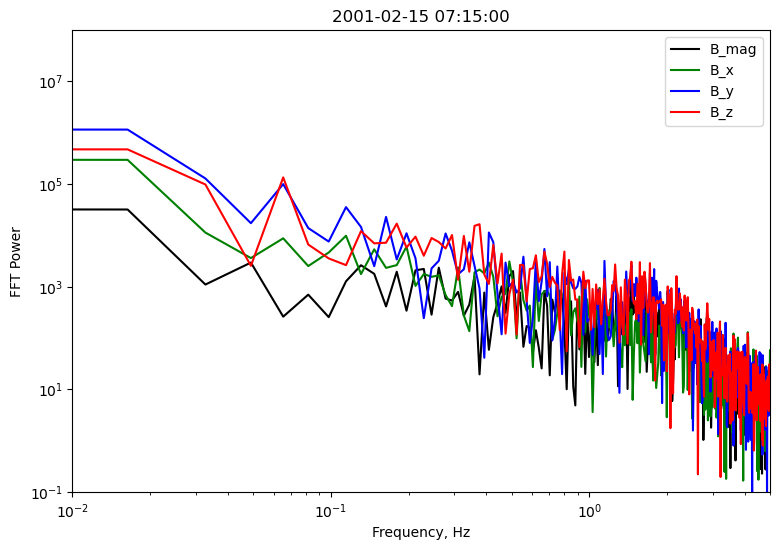

In [14]:
#FFT 2 mins

#FFT 2 mins
x_2a = df_2mins_ma['B_mag'].to_numpy()
x_2b = df_2mins_ma['Bx_gse'].to_numpy()
x_2c = df_2mins_ma['By_gse'].to_numpy()
x_2d = df_2mins_ma['Bz_gse'].to_numpy()
# sampling rate
sr = 22

X_2a = rfft(x_2a)
N_2a = len(X_2a)
n_2a = np.arange(N_2a)
T_2a = N_2a/sr
freq_2a = n_2a/T_2a
power_2a = np.abs(X_2a)**2


X_2b = rfft(x_2b)
N_2b = len(X_2b)
n_2b = np.arange(N_2b)
T_2b = N_2b/sr
freq_2b = n_2b/T_2b
power_2b = np.abs(X_2b)**2


X_2c = rfft(x_2c)
N_2c = len(X_2c)
n_2c = np.arange(N_2c)
T_2c = N_2c/sr
freq_2c = n_2c/T_2c
power_2c = np.abs(X_2c)**2


X_2d = rfft(x_2d)
N_2d = len(X_2d)
n_2d = np.arange(N_2d)
T_2d = N_2d/sr
freq_2d = n_2d/T_2d
power_2d = np.abs(X_2d)**2
##and plot

plt.figure(figsize = (9, 6))
plt.subplot(111)
plt.title('2001-02-15 07:15:00')
plt.plot(freq_2a, power_2a, color="black", label='B_mag')
plt.plot(freq_2b, power_2b, color="green", label='B_x')
plt.plot(freq_2c, power_2c, color="blue", label='B_y')
plt.plot(freq_2d, power_2d, color="red", label='B_z')
#plt.xlabel('Period (s)')
plt.xscale('log')
plt.yscale('log')
plt.ylabel('FFT Power')
plt.xlabel('Frequency, Hz')
plt.xlim(0.01, 5)
plt.ylim(0.1, 100_000_000)
plt.legend()

#plt.subplot(122)
#plt.plot(t, ifft(X), 'k')
#plt.xlabel('Time (s)')
#plt.ylabel('Amplitude')
#plt.tight_layout()
plt.show()

In [ ]:
from ULF_wave_freq import ULF_freq

ULF_freq(XMA, cluster_gipm, om_df, int_start)